# Test of F12 matrix elements

## Initialization

In [1]:
let png_image = print_endline ;;

(* --------- *)

#cd "/home/scemama/QCaml";;
#use "topfind";;
#require "jupyter.notebook";;

let png_image name = 
    Jupyter_notebook.display_file ~base64:true "image/png" ("Notebooks/images/"^name)
;;

#require "lacaml.top";;
#require "alcotest";;
#require "str";;
#require "bigarray";;
#require "zarith";;
#require "getopt";;
#directory "_build";;
#directory "_build/Basis";;
#directory "_build/CI";;
#directory "_build/MOBasis";;
#directory "_build/Nuclei";;
#directory "_build/Parallel";;
#directory "_build/Perturbation";;
#directory "_build/SCF";;
#directory "_build/Utils";;

val png_image : string -> unit = <fun>


- : unit = ()
Findlib has been successfully loaded. Additional directives:
  #require "package";;      to load a package
  #list;;                   to list the available packages
  #camlp4o;;                to load camlp4 (standard syntax)
  #camlp4r;;                to load camlp4 (revised syntax)
  #predicates "p,q,...";;   to set these predicates
  Topfind.reset();;         to force that packages will be reloaded
  #thread;;                 to enable threads

- : unit = ()


/home/scemama/qp2/external/opam/4.07.1/lib/bytes: added to search path
/home/scemama/qp2/external/opam/4.07.1/lib/base64: added to search path
/home/scemama/qp2/external/opam/4.07.1/lib/base64/base64.cma: loaded
/home/scemama/qp2/external/opam/4.07.1/lib/ocaml/compiler-libs: added to search path
/home/scemama/qp2/external/opam/4.07.1/lib/ocaml/compiler-libs/ocamlcommon.cma: loaded
/home/scemama/qp2/external/opam/4.07.1/lib/result: added to search path
/home/scemama/qp2/external/opam/4.07.1/lib/result/result.cma: loaded
/home/scemama/qp2/external/opam/4.07.1/lib/ppx_deriving/runtime: added to search path
/home/scemama/qp2/external/opam/4.07.1/lib/ppx_deriving/runtime/ppx_deriving_runtime.cma: loaded
/home/scemama/qp2/external/opam/4.07.1/lib/ppx_deriving_yojson/runtime: added to search path
/home/scemama/qp2/external/opam/4.07.1/lib/ppx_deriving_yojson/runtime/ppx_deriving_yojson_runtime.cma: loaded
/home/scemama/qp2/external/opam/4.07.1/lib/ocaml/unix.cma: loaded
/home/scemama/qp2/exte

val png_image : string -> Jupyter_notebook.display_id = <fun>


/home/scemama/qp2/external/opam/4.07.1/lib/ocaml/compiler-libs/ocamlbytecomp.cma: loaded
/home/scemama/qp2/external/opam/4.07.1/lib/ocaml/compiler-libs/ocamltoplevel.cma: loaded
/home/scemama/qp2/external/opam/4.07.1/lib/ocaml/bigarray.cma: loaded
/home/scemama/qp2/external/opam/4.07.1/lib/lacaml: added to search path
/home/scemama/qp2/external/opam/4.07.1/lib/lacaml/lacaml.cma: loaded
/home/scemama/qp2/external/opam/4.07.1/lib/lacaml/top: added to search path
/home/scemama/qp2/external/opam/4.07.1/lib/lacaml/top/lacaml_top.cma: loaded
/home/scemama/qp2/external/opam/4.07.1/lib/astring: added to search path
/home/scemama/qp2/external/opam/4.07.1/lib/astring/astring.cma: loaded
/home/scemama/qp2/external/opam/4.07.1/lib/cmdliner: added to search path
/home/scemama/qp2/external/opam/4.07.1/lib/cmdliner/cmdliner.cma: loaded
/home/scemama/qp2/external/opam/4.07.1/lib/seq: added to search path
/home/scemama/qp2/external/opam/4.07.1/lib/stdlib-shims: added to search path
/home/scemama/qp2/ex

### Modules

In [2]:
#load "Constants.cmo";;
#load_rec "Util.cma";;
#load_rec "Matrix.cmo";;
#load_rec "Simulation.cmo";;
#load_rec "Spindeterminant.cmo";;
#load_rec "Determinant.cmo";;
#load_rec "HartreeFock.cmo";;
#load_rec "MOBasis.cmo";;
#load_rec "F12CI.cmo";;

### Printers

In [3]:
#install_printer AngularMomentum.pp_string ;;
#install_printer Basis.pp ;;
#install_printer Charge.pp ;;
#install_printer Coordinate.pp ;;
#install_printer Vector.pp;;
#install_printer Matrix.pp;;
#install_printer Util.pp_float_2darray;;
#install_printer Util.pp_float_array;;
#install_printer Util.pp_matrix;;
#install_printer HartreeFock.pp ;;
#install_printer Fock.pp ;;
#install_printer MOClass.pp ;;
let pp_mo ppf t = MOBasis.pp ~start:1 ~finish:0 ppf t ;;
#install_printer pp_mo;;
(*
#install_printer DeterminantSpace.pp;;
*)
#install_printer SpindeterminantSpace.pp;;
#install_printer Bitstring.pp;;

(* --------- *)

open Lacaml.D


val pp_mo : Format.formatter -> MOBasis.t -> unit = <fun>


## Run

### Simulation


In [23]:
let basis_filename  = "/home/scemama/qp2/data/basis/6-31g" 
let aux_basis_filename = "/home/scemama/qp2/data/basis/cc-pvdz" 
let nuclei = Nuclei.of_zmt_string "n" 
let frozen_core = true 
let multiplicity = 2
let state = 1

let basis =  Basis.of_nuclei_and_basis_filenames ~nuclei [basis_filename] 
let aux_basis =  Basis.of_nuclei_and_basis_filenames ~nuclei (basis_filename :: aux_basis_filename :: []) 
let f12 = F12factor.gaussian_geminal 1.0 
let charge = 0 


let simulation =
    Simulation.make 
        ~f12 ~charge ~multiplicity ~nuclei
        ~cartesian:true
        basis


val basis_filename : string = "/home/scemama/qp2/data/basis/6-31g"


val aux_basis_filename : string = "/home/scemama/qp2/data/basis/cc-pvdz"


val nuclei : Nuclei.t = [|(Element.N,   0.0000   0.0000   0.0000)|]


val frozen_core : bool = true


val multiplicity : int = 2


val state : int = 1


val basis : Basis.t =
  
                          Atomic Basis set
                          ----------------

-----------------------------------------------------------------------
 #   Angular   Coordinates (Bohr)       Exponents       Coefficients
    Momentum  X        Y        Z
-----------------------------------------------------------------------
  1-3  S   0.0000   0.0000   0.0000   4.17351100e+03    1.83480000e-03
                                      6.27457900e+02    1.39950000e-02
                                      1.42902100e+02    6.85870000e-02
                                      4.02343300e+01    2.32241000e-01
                                      1.28202100e+01    4.69070000e-01
                                      4.39043700e+00    3.60455000e-01
                                    
                                      1.16263580e+01   -1.14961000e-01
                                      2.71628000e+00   -1.69118000e-01
                                    

val aux_basis : Basis.t =
  
                          Atomic Basis set
                          ----------------

-----------------------------------------------------------------------
 #   Angular   Coordinates (Bohr)       Exponents       Coefficients
    Momentum  X        Y        Z
-----------------------------------------------------------------------
  1-6  S   0.0000   0.0000   0.0000   4.17351100e+03    1.83480000e-03
                                      6.27457900e+02    1.39950000e-02
                                      1.42902100e+02    6.85870000e-02
                                      4.02343300e+01    2.32241000e-01
                                      1.28202100e+01    4.69070000e-01
                                      4.39043700e+00    3.60455000e-01
                                    
                                      1.16263580e+01   -1.14961000e-01
                                      2.71628000e+00   -1.69118000e-01
                                

val f12 : F12factor.t =
  {F12factor.expo_s = 1.;
   gaussian =
    {GaussianOperator.coef_g =
      [  -0.314400  -0.303700  -0.168100  -0.098110  -0.060240  -0.037260 ];
     expo_sg =
      [   0.220900   1.004000   3.622000  12.160000  45.870000 254.400000 ];
     expo_sg_inv =
      [   4.526935   0.996016   0.276091   0.082237   0.021801   0.003931 ]}}


val charge : int = 0


val simulation : Simulation.t = <abstr>


In [24]:
let n_elec_alfa, n_elec_beta, n_elec = 
  let e =  Simulation.electrons simulation in
  Electrons.(n_alfa e, n_beta e, n_elec e)

val n_elec_alfa : int = 4
val n_elec_beta : int = 3
val n_elec : int = 7


### Hartree-Fock

In [25]:
let hf =  HartreeFock.make ~guess:`Hcore ~max_scf:10 simulation  ;;

let mo_basis = MOBasis.of_hartree_fock hf

15 significant shell pairs computed in 0.005208 seconds
1
2
5
6
Computed ERIs in 0.026325 seconds
MOs =


          -- 1 --      -- 2 --     -- 3 --     -- 4 --   -- 5 --
            1    0.995805    -0.228629          -0           0        -0
            2   0.0207488     0.523688 2.54045E-16 1.78891E-15        -0
            3           0 -3.45043E-16    0.516899 5.11587E-15  0.306901
                      ...          ...         ...         ...       ...
            7           0           -0    0.381023  3.3482E-15  0.401251
            8           0 -6.37589E-16   -0.238604    0.273454  0.404641
            9           0     -6.8E-16    0.182264    0.357982 -0.309095
      

            -- 6 --      -- 7 --      -- 8 --      -- 9 --
            1            -0            0    0.0896964  4.08276E-15
            2   1.33506E-15 -3.60646E-15     -1.51213 -6.87142E-14
            3     -0.759946     0.656011 -2.25085E-15 -1.25628E-14
                        ...          ...          

val hf : HartreeFock.t = 
             Restricted Open-shell Hartree-Fock                      

    ------------------------------------------------------------
        #     HF energy       Convergence  HOMO-LUMO
    ------------------------------------------------------------
        1    -52.57862719      9.9817e-01     0.0835
        2    -54.20380931      2.2021e-01     0.2639
        3    -54.23392256      5.7771e-02     0.2682
        4    -54.24023663      2.1083e-02     0.2680
        5    -54.24159726      8.9827e-03     0.2673
        6    -54.24188853      4.2281e-03     0.2669
        7    -54.24195106      1.9862e-03     0.2667
        8    -54.24196836      1.6000e-05     0.2665
        9    -54.24196836      1.6302e-06     0.2665
       10    -54.24196843      3.8429e-08     0.2665
    ------------------------------------------------------------


               One-electron energy  -73.7477460896
                           Kinetic   54.1465371332
                     

val mo_basis : MOBasis.t =
  Eigenvalues:   -15.681404    -0.961606    -0.451178    -0.195149     0.040479 
            -- 1 --      -- 2 --     -- 3 --     -- 4 --   -- 5 --
      1    0.995805    -0.228629          -0           0        -0
      2   0.0207488     0.523688 2.54045E-16 1.78891E-15        -0
      3           0 -3.45043E-16    0.516899 5.11587E-15  0.306901
                ...          ...         ...         ...       ...
      7           0           -0    0.381023  3.3482E-15  0.401251
      8           0 -6.37589E-16   -0.238604    0.273454  0.404641
      9           0     -6.8E-16    0.182264    0.357982 -0.309095
  
  Eigenvalues:     0.908849     0.950925     0.975309     0.912008 
              -- 6 --      -- 7 --      -- 8 --      -- 9 --
      1            -0            0    0.0896964  4.08276E-15
      2   1.33506E-15 -3.60646E-15     -1.51213 -6.87142E-14
      3     -0.759946     0.656011 -2.25085E-15 -1.25628E-14
                  ...          ...       

 FCI-F12

Notations:

* $\langle ij || kl \rangle = \int \phi_i(r_1) \phi_j(r_2) \frac{1}{r_{12}} \phi_k(r1) \phi_l(r2) $ 
* $\left[ ij || kl \right] = \int \phi_i(r_1) \phi_j(r_2) f_{12} \phi_k(r1) \phi_l(r2) $ 


## Common functions

In [26]:
let f12 = Util.of_some @@ Simulation.f12 simulation 

let mo_num = MOBasis.size mo_basis 

let pp_spindet = Spindeterminant.pp mo_num

let pp_det = Determinant.pp mo_num

;;

#install_printer pp_spindet ;;
#install_printer pp_det ;;



val f12 : F12factor.t =
  {F12factor.expo_s = 1.;
   gaussian =
    {GaussianOperator.coef_g =
      [  -0.314400  -0.303700  -0.168100  -0.098110  -0.060240  -0.037260 ];
     expo_sg =
      [   0.220900   1.004000   3.622000  12.160000  45.870000 254.400000 ];
     expo_sg_inv =
      [   4.526935   0.996016   0.276091   0.082237   0.021801   0.003931 ]}}


val mo_num : int = 9


val pp_spindet : Format.formatter -> Spindeterminant.t -> unit = <fun>


val pp_det : Format.formatter -> Determinant.t -> unit = <fun>


In [27]:
let simulation_aux = 
    let charge        = Charge.to_int @@ Simulation.charge simulation 
    and multiplicity  = Electrons.multiplicity @@ Simulation.electrons simulation
    and nuclei        = Simulation.nuclei simulation
    in
    let general_basis = 
      Basis.general_basis @@ Simulation.basis simulation
    in
    GeneralBasis.combine [
      general_basis ; GeneralBasis.read aux_basis_filename
    ]
    |> Basis.of_nuclei_and_general_basis nuclei
    |> Simulation.make ~f12 ~charge ~multiplicity ~nuclei 


let aux_basis = 
  MOBasis.of_mo_basis simulation_aux mo_basis

let aux_num = 
  MOBasis.size aux_basis


val simulation_aux : Simulation.t = <abstr>


66 significant shell pairs computed in 0.050789 seconds
1
2
5
6
9
10
11
12
15
18
Computed ERIs in 0.889029 seconds


val aux_basis : MOBasis.t =
  Eigenvalues:   -15.681404    -0.961606    -0.451178    -0.195149     0.040479 
               -- 1 --      -- 2 --      -- 3 --      -- 4 --      -- 5 --
       1      0.995805    -0.228629 -1.04121E-12 -1.20393E-11 -7.74166E-12
       2     0.0207488     0.523688 -3.08871E-13 -4.88506E-13  -3.2349E-13
       3   2.26649E-12 -2.08563E-12     0.516899  3.82452E-12     0.306901
                   ...          ...          ...          ...          ...
      22             0            0            0            0           -0
      23             0            0            0            0           -0
      24             0            0            0            0           -0
  
  Eigenvalues:     0.908849     0.950925     0.975309     0.912008     2.032635 
                -- 6 --      -- 7 --      -- 8 --      -- 9 -- -- 10 --
       1   -1.59863E-11  1.67271E-11    0.0896964  8.01274E-12        0
       2    7.28187E-13 -1.60327E-12     -1.51213 -2.11029E-13 

val aux_num : int = 23


In [28]:
let () = ignore @@ MOBasis.f12_ints   aux_basis
let () = ignore @@ MOBasis.two_e_ints aux_basis

66 significant shell pairs computed in 0.842000 seconds
1
2
5
6
9
10
11
12
15
18
Computed ERIs in 17.257765 seconds


4-idx transformation 
23 / 23
4-idx transformation 
23 / 23


## Integral-based functions

\begin{equation}
\langle I | \hat{H} | J \rangle = \begin{cases}
\sum_i h_{ii} + \frac{1}{2} \sum_{ij} \langle ij || ij \rangle \text{ when } |J\rangle = |I\rangle \\
h_{ik} + \sum_{j} \langle ij || kj \rangle \text{ when } |J\rangle = \hat{T}_i^k |I\rangle \\
\langle ij || kl \rangle \text{ when } |J\rangle = \hat{T}_{ij}^{kl} |I\rangle \\
\end{cases}
\end{equation}


\begin{equation}
\langle I | \hat{F} | J \rangle = \begin{cases}
\sum_i f_{ii} + \frac{1}{2} \sum_{ij} \langle ij || ij \rangle \text{ when } |J\rangle = |I\rangle \\
f_{ik} + \sum_{j} \langle ij || kj \rangle \text{ when } |J\rangle = \hat{T}_i^k |I\rangle \\
\langle ij || kl \rangle \text{ when } |J\rangle = \hat{T}_{ij}^{kl} |I\rangle \\
\end{cases}
\end{equation}

In [29]:
let cancel_singles = false 

let mos_cabs = 
  Util.list_range (mo_num+1) aux_num
  
let mos_abs = 
  Util.list_range 1 aux_num
  
let mos_in = 
  Util.list_range 1 mo_num

let mos_a k =
  Determinant.alfa k
  |> Spindeterminant.to_list
  
let mos_b k =
  Determinant.beta k
  |> Spindeterminant.to_list
  

val cancel_singles : bool = false


val mos_cabs : int list =
  [10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23]


val mos_abs : int list =
  [1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21;
   22; 23]


val mos_in : int list = [1; 2; 3; 4; 5; 6; 7; 8; 9]


val mos_a : Determinant.t -> int list = <fun>


val mos_b : Determinant.t -> int list = <fun>


### H integrals

In [30]:
let h_one =
  let h = 
    MOBasis.one_e_ints aux_basis
  in fun i j _ -> h.{i,j}
  
let h_two = 
  let two_e_ints = MOBasis.two_e_ints aux_basis in
  let h2 i j k l (s:Spin.t) (s':Spin.t) =
    if s' <> s then
        ERI.get_phys two_e_ints i j k l
    else
        (ERI.get_phys two_e_ints i j k l) -.                                                 
        (ERI.get_phys two_e_ints i j l k)
  in
  h2

    
  

val h_one : int -> int -> '_weak2 -> float = <fun>


val h_two : int -> int -> int -> int -> Spin.t -> Spin.t -> float = <fun>


### F12 integrals

In [31]:
let f_two = 
  let two_e_ints = MOBasis.f12_ints aux_basis in
  let f2 i j k l (s:Spin.t) (s':Spin.t) =
    if s' <> s then
        0.5 *. F12.get_phys two_e_ints i j k l
    else
        0.5 *. (
         (F12.get_phys two_e_ints i j k l) -.                                                 
         (F12.get_phys two_e_ints i j l k) )
  in
  let f3 i j k l (s:Spin.t) (s':Spin.t) = 
      if (i=k && j<>l) || (j=l && i<>k) then
        0.
      else
        f2 i j k l s s'
  in
  if cancel_singles then f3 else f2

let f_one = fun _ _ _ -> 0.

(*
let f_two = h_two
*)

let f_one = h_one

val f_two : int -> int -> int -> int -> Spin.t -> Spin.t -> float = <fun>


val f_one : 'a -> 'b -> 'c -> float = <fun>


val f_one : int -> int -> '_weak2 -> float = <fun>


## Determinant-based functions

### Integrals

In [32]:
let f12_integrals mo_basis =
  ( f_one, f_two, None )

let h_ij mo_basis ki kj =
  let integrals =
    List.map (fun f -> f mo_basis)
      [ CI.h_integrals ]
  in
  CIMatrixElement.make integrals ki kj 
  |> List.hd


let f_ij mo_basis ki kj =
  let integrals =
    List.map (fun f -> f mo_basis)
      [ f12_integrals ]
  in
  CIMatrixElement.make integrals ki kj 
  |> List.hd                                                                                  


let hf_ij mo_basis ki kj =
  let integrals =
    List.map (fun f -> f mo_basis)
      [ CI.h_integrals ; f12_integrals ]
  in
  CIMatrixElement.make integrals ki kj




val f12_integrals :
  'a ->
  (int -> int -> '_weak2 -> float) *
  (int -> int -> int -> int -> Spin.t -> Spin.t -> float) * 'b option = <fun>


val h_ij : MOBasis.t -> CIMatrixElement.De.t -> CIMatrixElement.De.t -> float =
  <fun>


val f_ij : 'a -> CIMatrixElement.De.t -> CIMatrixElement.De.t -> float =
  <fun>


val hf_ij :
  MOBasis.t -> CIMatrixElement.De.t -> CIMatrixElement.De.t -> float list =
  <fun>


### Determinant space

In [33]:
let is_a_double det_space =
    let mo_class = DeterminantSpace.mo_class det_space in
    let mo_num = Array.length @@ MOClass.mo_class_array mo_class in
    let m l =
      List.fold_left (fun accu i ->
          let j = i-1 in Bitstring.logor accu (Bitstring.shift_left_one mo_num j)
        ) (Bitstring.zero mo_num) l
    in
    let aux_mask   = m (MOClass.auxiliary_mos mo_class) in
    fun k ->                                                                                  
      let alfa =
        Determinant.alfa k
        |> Spindeterminant.bitstring
      in
      let beta =
        Determinant.beta k
        |> Spindeterminant.bitstring
      in
      let a = Bitstring.logand aux_mask alfa
      and b = Bitstring.logand aux_mask beta
      in
      match Bitstring.popcount a + Bitstring.popcount b with
      | 2 | 1 -> true
      | 0 | _ -> false



val is_a_double : DeterminantSpace.t -> Determinant.t -> bool = <fun>


In [34]:
let in_space = 
    DeterminantSpace.fci_f12_of_mo_basis aux_basis ~frozen_core mo_num
    
let aux_space = 
    DeterminantSpace.fci_of_mo_basis aux_basis ~frozen_core 

let det_space_in () =
    DeterminantSpace.determinant_stream in_space

let det_space_out () =
    let s = 
        DeterminantSpace.determinant_stream aux_space
    in
    Stream.from (fun _ ->
        try
          let is_a_double = is_a_double in_space in
          let rec result () =
            let ki = Stream.next s in
            if is_a_double ki then
              Some (ki,ki)
            else
              result ()
          in
          result ()
        with Stream.Failure -> None
      )
    

Number of determinants : 56 28 1568


val in_space : DeterminantSpace.t = <abstr>


Number of determinants : 1540 231 355740


val aux_space : DeterminantSpace.t = <abstr>


val det_space_in : unit -> Determinant.t Stream.t = <fun>


val det_space_out : unit -> (Determinant.t * Determinant.t) Stream.t = <fun>


In [35]:
let ci = CI.make ~n_states:state in_space

let ci_coef, ci_energy = Lazy.force ci.eigensystem 

let _ = print_newline () 


val ci : CI.t =
  {CI.e_shift = -54.2419683633284677; det_space = <abstr>; m_H = <lazy>;
   m_S2 = <lazy>; eigensystem = <lazy>; n_states = 1}


  1     0.0000000000    5.38465905e-01
  2    -0.0538262193    1.87217169e-01
  3    -0.0657011468    6.52524404e-02
  4    -0.0682884307    4.47790537e-02
  5    -0.0722202576    2.28670803e-02
  6    -0.0732730385    5.26351716e-03
  7    -0.0733234182    9.38250052e-04
  8    -0.0733249420    2.14671657e-04
  0    -0.0733250301    7.26676403e-05
  1    -0.0733250395    2.46738965e-05
  2    -0.0733250400    1.50948498e-05
  3    -0.0733250400    4.00236940e-06
  4    -0.0733250400    1.38596264e-06


val ci_coef : Lacaml.D.Mat.t =
  

            -- 1 --
           1   0.701258
           2          0
           3          0
                    ...
        1566          0
        1567          0
        1568          0
  
val ci_energy : Lacaml.D.Vec.t =
        R1       R2       R3           R5       R6       R7
  -54.3153 -54.1549 -53.2726 ... -51.7367 -51.4918 -50.3061


  5    -0.0733250400    7.40047633e-07



- : unit = ()


Permutation operator $p_{12}$ that generates a new determinant with electrons 1 and 2 swapped.

## Matrices $\langle I | H | \alpha \rangle$ and $\langle I | F | \alpha \rangle$ 

In [36]:
let randomize = false

let out_list =
    Util.stream_to_list (det_space_out ())
    
let in_list =
    Util.stream_to_list (det_space_in ())
    
let det_a = Array.of_list out_list
            |> Array.map (fun (i,_) -> i)

let det_I =
  if randomize then
    let n = 123456789 in
    in_list
    |> List.map (fun k -> (Random.int n, k))
    |> List.sort compare
    |> List.map  (fun (_,k) -> k)
    |> Array.of_list
  else
    Array.of_list in_list


val randomize : bool = false


val out_list : (Determinant.t * Determinant.t) list =
  [(phase:+1
    a:+1 +++------+------------------------------------------------------
    b:+1 +++-------------------------------------------------------------
,
phase:+1
a:+1 +++------+------------------------------------------------------
b:+1 +++-------------------------------------------------------------
);
(phase:+1
 a:+1 ++-+-----+------------------------------------------------------
 b:+1 +++-------------------------------------------------------------
,
phase:+1
a:+1 ++-+-----+------------------------------------------------------
b:+1 +++-------------------------------------------------------------
);
(phase:+1
 a:+1 +-++-----+------------------------------------------------------
 b:+1 +++-------------------------------------------------------------
,
phase:+1
a:+1 +-++-----+------------------------------------------------------
b:+1 +++-------------------------------------------------------------
);
(phase:+1
 a:+1 ++-

val in_list : Determinant.t list =
  [phase:+1
   a:+1 ++++------------------------------------------------------------
   b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 +++-+-----------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 ++-++-----------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 +-+++-----------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 +++--+----------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 ++-+-+----------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 +-++-+------------------------------

val det_a : Determinant.t array =
  [|phase:+1
    a:+1 +++------+------------------------------------------------------
    b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 ++-+-----+------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 +-++-----+------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 ++--+----+------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 +-+-+----+------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 +--++----+------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 ++---+---+------------------------

val det_I : Determinant.t array =
  [|phase:+1
    a:+1 ++++------------------------------------------------------------
    b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 +++-+-----------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 ++-++-----------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 +-+++-----------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 +++--+----------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 ++-+-+----------------------------------------------------------
b:+1 +++-------------------------------------------------------------
;
phase:+1
a:+1 +-++-+----------------------------

Function to generate all intermediate external determinants $|\alpha \rangle$ between $|I\rangle$ and $|J\rangle$, with a positive phase factor.

* `exc` is the degree of excitation between $|I\rangle$ and $|J\rangle$
* `cabs` is the number of electrons in the CABS
* `l` is the degree of excitation between $|I\rangle$ and $|\alpha \rangle$
* `r` is the degree of excitation between $|\alpha \rangle$ and $|J\rangle$

In [37]:
let generate_alphas ki kj exc cabs l r =
  (* Check input excitation degree *)
  let d = Determinant.degree ki kj in
  if d <> exc then
    Printf.sprintf "Invalid excitation degree. Expected %d and found %d." exc d
    |> failwith;
    
  (* Generate single excitations *)
  let all_singles ki =
      let mos_a, mos_b = Determinant.to_lists ki in
      [ List.map (fun hole -> 
          List.map (fun particle ->
               if hole = particle then None else
                  Some (Determinant.single_excitation Spin.Alfa hole particle ki)
              ) mos_abs
          ) mos_a
      ;
        List.map (fun hole -> 
          List.map (fun particle ->
               if hole = particle then None else
                 Some (Determinant.single_excitation Spin.Beta hole particle ki)
              ) mos_abs
          ) mos_b 
      ]
      |> List.concat
      |> List.concat
      |> Util.list_some
      |> List.filter (fun x -> Determinant.is_none x = false)
      |> List.map (fun x -> Determinant.set_phase Phase.Pos x)
  in
  
  (* Generate double excitations *)
  let all_doubles ki =
      let mos_a, mos_b = Determinant.to_lists ki in
      [ List.map (fun hole ->  (* Alpha-Alpha *)
          List.map (fun particle ->
            List.map (fun hole' -> 
              List.map (fun particle' ->
                if hole = particle || hole' = particle' then None else
                if hole' > hole && particle' < particle then
                  Some (Determinant.double_excitation Spin.Alfa hole particle Spin.Alfa hole' particle' ki)
                else None
                      ) mos_abs
                  ) mos_a 
              ) mos_abs
          ) mos_a
        ; 
        List.map (fun hole ->  (* Beta-Beta *)
          List.map (fun particle ->
            List.map (fun hole' -> 
              List.map (fun particle' ->
                if hole' > hole && particle' < particle && hole <> particle && hole' <> particle' then
                  Some (Determinant.double_excitation Spin.Beta hole particle Spin.Beta hole' particle' ki)
                else None
                      ) mos_abs
                  ) mos_b 
              ) mos_abs
          ) mos_b
        ;
        List.map (fun hole ->  (* Alpha-Beta *)
          List.map (fun particle ->
            List.map (fun hole' -> 
              List.map (fun particle' ->
                  if hole = particle || hole' = particle' then None else
                  Some (Determinant.double_excitation Spin.Alfa hole particle Spin.Beta hole' particle' ki)
                      ) mos_abs
                  ) mos_b 
              ) mos_abs
          ) mos_a
      ]
      |> List.concat
      |> List.concat
      |> List.concat
      |> List.concat
      |> Util.list_some
      |> List.filter (fun x -> Determinant.is_none x = false)
      |> List.map (fun x -> Determinant.set_phase Phase.Pos x)
  in

  (* Generate left and right excitations *)
  let al = 
      match l with
      | 1 -> all_singles ki
      | 2 -> all_doubles ki
      | _ -> assert false
  in
  let ar = 
      match r with
      | 1 -> all_singles kj
      | 2 -> all_doubles kj
      | _ -> assert false
  in
  
  let mo_class = DeterminantSpace.mo_class in_space in
  let m l =
    List.fold_left (fun accu i ->
        let j = i-1 in Bitstring.logor accu (Bitstring.shift_left_one mo_num j)
      ) (Bitstring.zero mo_num) l
  in
  let aux_mask = m (MOClass.auxiliary_mos mo_class) in
  let good_cabs k = 
      let alfa =
        Determinant.alfa k
        |> Spindeterminant.bitstring
      in
      let beta =
        Determinant.beta k
        |> Spindeterminant.bitstring
      in
      let a = Bitstring.logand aux_mask alfa
      and b = Bitstring.logand aux_mask beta
      in
      Bitstring.popcount a + Bitstring.popcount b = cabs
  in
  let good_lr k =
    Determinant.degree ki k = l &&
    Determinant.degree k kj = r 
  in


  
  (* Merge lists in a set of unique determinants *)
  List.concat [ al; ar ]
  |> List.sort_uniq compare
  
  (* Filter out all determinants with incorrect numbers of electrons in the CABS *)
  |> List.filter good_cabs 
  
  (* Filter out all determinants with incorrect excitation numbers *)
  |> List.filter good_lr 
  
  
let compute_HaaF ki alphas kj =
   List.fold_left (fun accu alpha -> accu
      +. h_ij aux_basis ki alpha
      *. f_ij aux_basis alpha kj
    ) 0. alphas


val generate_alphas :
  Determinant.t ->
  Determinant.t -> int -> int -> int -> int -> Determinant.t list = <fun>


val compute_HaaF :
  CIMatrixElement.De.t ->
  CIMatrixElement.De.t list -> CIMatrixElement.De.t -> float = <fun>


In [38]:
let check n integral_value exc cabs lexc rexc =
  let cpudet, cpuint = ref 0., ref 0. in
  let det_list =
      match n with
        | 0 -> det_I
        | n -> Array.sub det_I 0 n
  in
  let result =
        Printf.printf "Checking ... \n%!";
        let percent = ref 0 in
        let task (i,ki) =
            (let p = (10 * (i+1))/(Array.length det_list) in
            if p <> !percent then
                ( percent := p ; Printf.printf " - %3d %%\n%!" (p*10) ));
            Array.mapi (fun j kj -> 
                if i > j || Determinant.degree ki kj <> exc then
                    (0,0,0.,0.)
                else
                  begin
                    let alphas = generate_alphas ki kj exc cabs lexc rexc in
                    let det_value =
                      let t0 = Unix.gettimeofday () in
                      let result = compute_HaaF ki alphas kj in
                      cpudet := !cpudet +. Unix.gettimeofday () -. t0;
                      result
                    in
                    let int_value = 
                      let t0 = Unix.gettimeofday () in
                      let result = integral_value ki kj in
                      cpuint := !cpuint +. Unix.gettimeofday () -. t0;
                      result
                    in
(*   Printf.printf "%d %d %e %e\n%!" i j det_value int_value;  *)
                    (i,j,det_value,int_value)
                  end
            ) det_list
        in
        det_list
        |> Array.mapi (fun i ki -> (i,ki))
        |> Array.to_list
        |> Stream.of_list
        |> Farm.run ~f:task
        |> Util.stream_to_list
        |> Array.concat
  in
  let i,j,d,v = 
      let rec aux k imax jmax emax dmax vmax = 
        if k = -1 then
          imax, jmax, dmax, vmax
        else
          let i, j, d, v = result.(k) in
          let e = abs_float (d -. v) in
          if e >= emax then
            aux (k-1) i j e d v
          else
            aux (k-1) imax jmax emax dmax vmax
      in
      aux (Array.length result - 1) 0 0 0. 0. 0.
  in
  let error = abs_float (d -. v) in
  if error < epsilon_float then
  (*
      Printf.printf "OK: %e\n%!" error
      *)
      Printf.printf "OK: (%d, %d) | %e %e | %e  |  cpu : %f  %f\n%!" i j d v error !cpudet !cpuint
  else
      Printf.printf "Failed: (%d, %d) | %e %e | %e  |  cpu : %f %f\n%!" i j d v error !cpudet !cpuint

    
let sum l f = List.fold_left (fun accu i -> accu +. f i) 0. l

val check :
  int ->
  (CIMatrixElement.De.t -> CIMatrixElement.De.t -> float) ->
  int -> int -> int -> int -> unit = <fun>


val sum : 'a list -> ('a -> float) -> float = <fun>


In [39]:
let array_3_init d1 d2 d3 f =
  let result = 
      Bigarray.(Array3.create Float64 fortran_layout) d1 d2 d3
  in
  for k=1 to d3 do
      for j=1 to d2 do
          for i=1 to d1 do
             result.{i,j,k} <- f i j k
          done
      done
  done;
  result


let array_4_init d1 d2 d3 d4 f =
  let result = 
      Bigarray.(Genarray.create Float64 fortran_layout) [| d1;d2;d3;d4 |]
  in
  for l=1 to d4 do
    for k=1 to d3 do
      for j=1 to d2 do
        for i=1 to d1 do
           result.{i,j,k,l} <- f i j k l
        done
      done
    done
  done;
  result


let array_5_init d1 d2 d3 d4 d5 f =
  let result = 
      Bigarray.(Genarray.create Float64 fortran_layout) [| d1;d2;d3;d4;d5 |]
  in
  for m=1 to d5 do
    for l=1 to d4 do
      for k=1 to d3 do
        for j=1 to d2 do
          for i=1 to d1 do
             result.{i,j,k,l,m} <- f i j k l m
          done
        done
      done
    done
  done;
  result

(* ----- *)

val array_3_init :
  int ->
  int ->
  int ->
  (int -> int -> int -> float) ->
  (float, Bigarray.float64_elt, Bigarray.fortran_layout) Bigarray.Array3.t =
  <fun>


val array_4_init :
  int ->
  int ->
  int ->
  int ->
  (int -> int -> int -> int -> float) ->
  (float, Bigarray.float64_elt, Bigarray.fortran_layout) Bigarray.Genarray.t =
  <fun>


val array_5_init :
  int ->
  int ->
  int ->
  int ->
  int ->
  (int -> int -> int -> int -> int -> float) ->
  (float, Bigarray.float64_elt, Bigarray.fortran_layout) Bigarray.Genarray.t =
  <fun>


******

# 1. 0 1 11

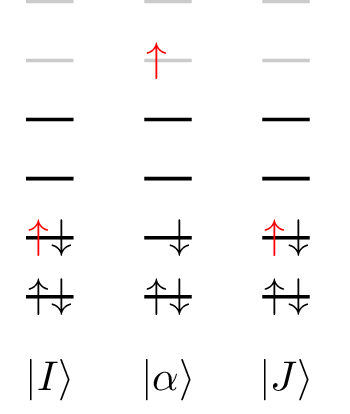

- : Jupyter_notebook.display_id = <abstr>


In [40]:
let _ = png_image "0_1_11.png"

$i,j$ : orbital indices of MOs occupied in $|I\rangle$.

$\sum_i \sum_a \hat{T}_{i}^{a} \hat{T}_{a}^{i}$

\begin{align}
\sum_{a} \sum_{i}
        \left( h_{ia} +
            \sum_{j} \langle i j || a j \rangle +
            \sum_{\bar{j}} \langle i \bar{j} | a \bar{j} \rangle \right) 
        \left( f_{ai} +
            \sum_{j}  \left[ a j || i j \right] + 
            \sum_{\bar{j}}  \left[ a \bar{j} | i \bar{j} \right] \right) + \\
\sum_{\bar{a}}  \sum_{\bar{i}}
        \left( h_{ia} +
            \sum_{j} \langle \bar{i} j | \bar{a} j \rangle +
            \sum_{\bar{j}} \langle \bar{i} \bar{j} || \bar{a} \bar{j} \rangle \right) 
        \left( f_{ai} +
            \sum_{j}  \left[ \bar{a} j | \bar{i} j \right] + 
            \sum_{\bar{j}}  \left[ \bar{a} \bar{j} || \bar{i} \bar{j} \right] \right)  
\end{align}

In [41]:
let integral_value ki kj = 
   (* Alpha-Beta *)
   let s, s' = Spin.(Alfa, Beta) in 
   let mos_a, mos_b = mos_a ki, mos_b ki in
   
   sum mos_cabs (fun a ->
      sum mos_a (fun i -> 
           (h_one i a s  +.
               sum mos_a (fun j -> h_two i j a j s s ) +.
               sum mos_b (fun j -> h_two i j a j s s')
               ) *. 
           (f_one a i s  +.
               sum mos_a (fun j -> f_two a j i j s s ) +.
               sum mos_b (fun j -> f_two a j i j s s')
               )
         )
       +.
       sum mos_b (fun i -> 
           (h_one i a s'  +.
               sum mos_b (fun j -> h_two i j a j s' s') +.
               sum mos_a (fun j -> h_two i j a j s' s )
               ) *. 
           (f_one a i s'  +.
               sum mos_b (fun j -> f_two a j i j s' s') +.
               sum mos_a (fun j -> f_two a j i j s' s )
               )
         ) 
     ) 
     
let _ =
  check 0 integral_value 0 1 1 1
    

val integral_value : Determinant.t -> 'a -> float = <fun>


Checking ... 
 -  10 %
 -  20 %
 -  30 %
 -  40 %
 -  50 %
 -  60 %
 -  70 %
 -  80 %
 -  90 %
 - 100 %
Failed: (135, 135) | 2.284769e+00 2.284769e+00 | 1.776357e-15  |  cpu : 2.160390 0.491860


- : unit = ()


In [42]:
let m_0111_1H_1F = 
  Vec.init mo_num (fun i -> 
        sum mos_cabs (fun a ->
            h_one i a Spin.Alfa *. f_one a i Spin.Alfa ))

    
let m_0111_1H_2Fa = 
  Mat.init_cols mo_num mo_num (fun i j -> sum mos_cabs (fun a ->
    h_one i a Spin.Alfa *. f_two a j i j Spin.Alfa Spin.Alfa  ))

    
let m_0111_1H_2Fb = 
  Mat.init_cols mo_num mo_num (fun i j -> sum mos_cabs (fun a ->
    h_one i a Spin.Alfa *. f_two a j i j Spin.Alfa Spin.Beta  ))


let m_0111_2Ha_1F = 
  Mat.init_cols mo_num mo_num (fun i j -> sum mos_cabs (fun a ->
    h_two i j a j Spin.Alfa Spin.Alfa *. f_one a i Spin.Alfa ))

    
let m_0111_2Hb_1F = 
  Mat.init_cols mo_num mo_num (fun i j -> sum mos_cabs (fun a ->
    h_two i j a j Spin.Alfa Spin.Beta *. f_one a i Spin.Alfa ))


let m_0111_2Ha_2Fa =
  array_3_init mo_num mo_num mo_num (fun i j k ->
    sum mos_cabs (fun a ->
      h_two i j a j Spin.Alfa Spin.Alfa *.
      f_two a k i k Spin.Alfa Spin.Alfa 
    )
  )


let m_0111_2Hb_2Fa =
  array_3_init mo_num mo_num mo_num (fun i j k ->
    sum mos_cabs (fun a ->
      h_two i j a j Spin.Alfa Spin.Beta *.
      f_two a k i k Spin.Alfa Spin.Alfa 
    )
  )


let m_0111_2Ha_2Fb =
  array_3_init mo_num mo_num mo_num (fun i j k ->
    sum mos_cabs (fun a ->
      h_two i j a j Spin.Alfa Spin.Alfa *.
      f_two a k i k Spin.Alfa Spin.Beta 
    )
  )


let m_0111_2Hb_2Fb =
  array_3_init mo_num mo_num mo_num (fun i j k ->
    sum mos_cabs (fun a ->
      h_two i j a j Spin.Alfa Spin.Beta *.
      f_two a k i k Spin.Alfa Spin.Beta 
    )
  )



let integral_value ki kj = 

   let mos_a, mos_b = mos_a ki, mos_b ki in
   
   sum mos_a (fun i ->
     m_0111_1H_1F.{i} +. 
     sum mos_a (fun j ->
       m_0111_2Ha_1F.{i,j} +.
       m_0111_1H_2Fa.{i,j} +.
       sum mos_a (fun k -> m_0111_2Ha_2Fa.{i,j,k}) +.
       sum mos_b (fun k -> m_0111_2Ha_2Fb.{i,j,k})
       ) +.
     sum mos_b (fun j ->
       m_0111_2Hb_1F.{i,j} +.
       m_0111_1H_2Fb.{i,j} +.
       sum mos_a (fun k -> m_0111_2Hb_2Fa.{i,j,k}) +.
       sum mos_b (fun k -> m_0111_2Hb_2Fb.{i,j,k})
       )
     )
   +.
   sum mos_b (fun i ->
     m_0111_1H_1F.{i} +. 
     sum mos_b (fun j ->
       m_0111_2Ha_1F.{i,j} +.
       m_0111_1H_2Fa.{i,j} +.
       sum mos_b (fun k -> m_0111_2Ha_2Fa.{i,j,k}) +.
       sum mos_a (fun k -> m_0111_2Ha_2Fb.{i,j,k})
       ) +.
     sum mos_a (fun j ->
       m_0111_2Hb_1F.{i,j} +.
       m_0111_1H_2Fb.{i,j} +.
       sum mos_b (fun k -> m_0111_2Hb_2Fa.{i,j,k}) +.
       sum mos_a (fun k -> m_0111_2Hb_2Fb.{i,j,k})
       )
     )
   
let _ =
  check 0 integral_value 0 1 1 1
    

val m_0111_1H_1F : Lacaml.D.vec =
       R1       R2       R3          R7       R8      R9
  1.23163 0.512679 0.379158 ... 1.15717 0.783246 0.94134


val m_0111_1H_2Fa : Lacaml.D.mat =
  

          -- 1 --     -- 2 --     -- 3 --    -- 4 --     -- 5 --
        1           0 9.54805E-05 0.000949414 0.00102124 0.000612123
        2   0.0157601           0  0.00387182  0.0040609  0.00288411
        3   0.0123451  0.00482411           0 0.00262065  0.00153994
                  ...         ...         ...        ...         ...
        7   0.0638665   0.0309407   0.0280828  0.0291155   0.0201909
        8    0.035099  0.00993291   0.0123105  0.0128627   0.0095454
        9   0.0546496   0.0268732   0.0249878  0.0209954     0.02047
  

            -- 6 --    -- 7 --      -- 8 --    -- 9 --
        1    0.00135039 0.00168769 -2.50132E-05 0.00127857
        2    0.00164244 0.00263016   -0.0049468 0.00145336
        3   -0.00786828 0.00262225  0.000307787 0.00154154
                    ...        ...          ...        ...
        7     0.0210255          0    0.0169901  0.0199928
        8     0.0097481  0.0125132            0 0.00919583


val m_0111_1H_2Fb : Lacaml.D.mat =
  

           -- 1 --     -- 2 --     -- 3 --     -- 4 --     -- 5 --
        1   0.00838947 0.000802512 0.000774268 0.000824527 0.000531664
        2    0.0167558  0.00284141  0.00289398  0.00311638  0.00181881
        3    0.0138217  0.00142914 0.000717031  0.00205097  0.00097096
                   ...         ...         ...         ...         ...
        7    0.0672127   0.0297099   0.0280681    0.029107    0.022267
        8    0.0361343   0.0135355   0.0127802   0.0133849  0.00974314
        9    0.0572555   0.0267995   0.0251558   0.0264006    0.020602
  

            -- 6 --    -- 7 --     -- 8 --     -- 9 --
        1   0.000838226 0.00108083 0.000590322 0.000787968
        2    0.00312393  0.0041991  0.00210452  0.00290152
        3    0.00156923 0.00296985 0.000876672  0.00188984
                    ...        ...         ...         ...
        7     0.0206994  0.0254055   0.0187116   0.0196605
        8    0.00965382  0.0126909  0.00818

val m_0111_2Ha_1F : Lacaml.D.mat =
  

          -- 1 --    -- 2 --     -- 3 --    -- 4 --     -- 5 --
        1           0 0.00346355 -0.00957818 -0.0103791 -0.00586334
        2   -0.121634          0   -0.019873 -0.0209946  -0.0141534
        3   -0.115395 -0.0247239           0  -0.017339  -0.0100747
                  ...        ...         ...        ...         ...
        7   -0.405587  -0.140299   -0.129164  -0.134263  -0.0844326
        8   -0.207751 -0.0414479  -0.0574012 -0.0601297  -0.0438726
        9   -0.335499  -0.120993   -0.113422 -0.0875797   -0.091945
  

           -- 6 --    -- 7 --     -- 8 --    -- 9 --
        1   -0.0155848 -0.0192997  0.00228062 -0.0147839
        2   -0.0112498 -0.0169694   0.0224836 -0.0101282
        3    0.0322167 -0.0204013 -0.00423111  -0.013137
                   ...        ...         ...        ...
        7    -0.106147          0  -0.0844097  -0.101048
        8   -0.0490936 -0.0626221           0 -0.0463651
        9   -0.0928575

val m_0111_2Hb_1F : Lacaml.D.mat =
  

          -- 1 --    -- 2 --     -- 3 --     -- 4 --     -- 5 --
        1   -0.267262 -0.0092275 -0.00385375 -0.00417671 -0.00235846
        2   -0.165952 -0.0180838  -0.0197588  -0.0214917  -0.0115557
        3   -0.149576 -0.0113644   -0.010116  -0.0155245 -0.00736965
                  ...        ...         ...         ...         ...
        7   -0.487134  -0.140774    -0.13287   -0.138318   -0.111128
        8   -0.253633 -0.0687529  -0.0664679  -0.0700869  -0.0486229
        9   -0.399565  -0.125537   -0.117439   -0.133629  -0.0946778
  

            -- 6 --     -- 7 --     -- 8 --     -- 9 --
        1   -0.00636217 -0.00785747 -0.00673128 -0.00603921
        2    -0.0272961  -0.0354992  -0.0184917  -0.0255632
        3    -0.0207391  -0.0252065  -0.0100414  -0.0170516
                    ...         ...         ...         ...
        7     -0.111178   -0.151723  -0.0978176    -0.10573
        8    -0.0587109  -0.0765558  -0.0468344  -0.0

val m_0111_2Ha_2Fa :
  (float, Bigarray.float64_elt, Bigarray.fortran_layout) Bigarray.Array3.t =
  <abstr>


val m_0111_2Hb_2Fa :
  (float, Bigarray.float64_elt, Bigarray.fortran_layout) Bigarray.Array3.t =
  <abstr>


val m_0111_2Ha_2Fb :
  (float, Bigarray.float64_elt, Bigarray.fortran_layout) Bigarray.Array3.t =
  <abstr>


val m_0111_2Hb_2Fb :
  (float, Bigarray.float64_elt, Bigarray.fortran_layout) Bigarray.Array3.t =
  <abstr>


val integral_value : Determinant.t -> 'a -> float = <fun>


Checking ... 
 -  10 %
 -  20 %
 -  30 %
 -  40 %
 -  50 %
 -  60 %
 -  70 %
 -  80 %
 -  90 %
 - 100 %
Failed: (225, 225) | 2.333780e+00 2.333780e+00 | 1.776357e-15  |  cpu : 2.156856 0.039502


- : unit = ()


# 2. 0 1 22

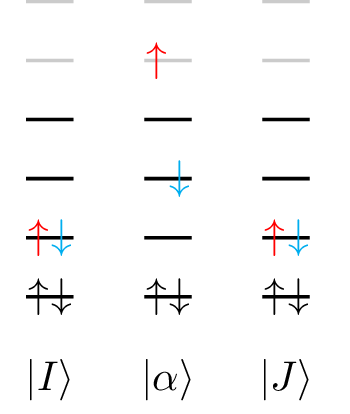

- : Jupyter_notebook.display_id = <abstr>


In [43]:
let _ = png_image "0_1_22.png"

$i,j$ : orbital indices of MOs   occupied in $|I\rangle$.

$k$   : orbital indices of MOs unoccupied in $|I\rangle$.

$\sum_i \sum_a \sum_j \sum_k \hat{T}_{ij}^{ak} \hat{T}_{ak}^{ij}$


\begin{align}
\sum_{a} \sum_{k} \sum_{i} \sum_{j<i}
            \langle i j || a k \rangle 
             \left[ a k || i j \right] + 
\sum_{a} \sum_{\bar{k}} \sum_{i} \sum_{\bar{j}}
            \langle i \bar{j} | a \bar{k} \rangle 
             \left[ a \bar{k} | i \bar{j} \right]  + \\
\sum_{\bar{a}} \sum_{k} \sum_{\bar{i}} \sum_{j}
            \langle \bar{i} j | \bar{a} k \rangle 
             \left[ \bar{a} k | \bar{i} j \right] + 
\sum_{\bar{a}} \sum_{\bar{k}} \sum_{\bar{i}} \sum_{\bar{j}<\bar{i}}
            \langle \bar{i} \bar{j} || \bar{a} \bar{k} \rangle 
             \left[ \bar{a} \bar{k} || \bar{i} \bar{j} \right] 
\end{align}

In [44]:
let integral_value ki kj = 
   (* mos unoccupied in both I and J *)
   let mos_virt_a, mos_virt_b = 
     Array.init mo_num (fun i -> Some (i+1)) , 
     Array.init mo_num (fun i -> Some (i+1)) 
   in
   List.iter (fun i -> mos_virt_a.(i-1) <- None) (mos_a ki);
   List.iter (fun i -> mos_virt_a.(i-1) <- None) (mos_a kj);
   List.iter (fun i -> mos_virt_b.(i-1) <- None) (mos_b ki);
   List.iter (fun i -> mos_virt_b.(i-1) <- None) (mos_b kj);
   
   let mos_virt_a, mos_virt_b = 
     Array.to_list mos_virt_a |> Util.list_some,
     Array.to_list mos_virt_b |> Util.list_some
   in
   
   (* Alpha-Beta *)
   let s, s' = Spin.(Alfa, Beta) in
   sum mos_cabs   (fun a ->
   sum (mos_b ki) (fun j ->  
   sum (mos_a ki) (fun i ->  
   sum mos_virt_b (fun k ->  
       h_two i j a k s s'  *. f_two a k i j s s'
   )))
   +.
   sum (mos_a ki) (fun j ->  
   sum (mos_b ki) (fun i ->  
   sum mos_virt_a (fun k ->  
       h_two i j a k s s'  *. f_two a k i j s s'
   )))) 
   +.
   (* Alpha-Alpha / Beta-Beta *)
   List.fold_left (fun accu (mos_virt,mos,s) -> 
     let s' = s in accu +.
     sum mos (fun j ->  
     sum mos (fun i -> if i < j then 0. else
     sum mos_virt (fun k ->  
     sum mos_cabs (fun a -> 
       h_two i j a k s s'  *. f_two a k i j s s'
     )))) 
   ) 0. [ (mos_virt_a,mos_a ki,Spin.Alfa) ; (mos_virt_b,mos_b ki,Spin.Beta)]
     
let _ =
  check 100 integral_value 0 1 2 2
    

val integral_value : Determinant.t -> Determinant.t -> float = <fun>


Checking ... 
 -  10 %
 -  20 %
 -  30 %
 -  40 %
 -  50 %
 -  60 %
 -  70 %
 -  80 %
 -  90 %
 - 100 %
OK: (22, 22) | -3.896807e-02 -3.896807e-02 | 6.245005e-17  |  cpu : 2.708850  0.154509


- : unit = ()


In [46]:
let m_0122_Haa = 
  array_3_init mo_num mo_num mo_num (fun i j k ->
      sum mos_cabs (fun a ->
        h_two i j a k Spin.Alfa Spin.Alfa *. f_two a k i j Spin.Alfa Spin.Alfa
        ) )
      
let m_0122_Hab = 
  array_3_init mo_num mo_num mo_num (fun i j k ->
      sum mos_cabs (fun a ->
         h_two i j a k Spin.Alfa Spin.Beta *. f_two a k i j Spin.Alfa Spin.Beta
      ) )


let integral_value ki kj = 
   (* mos unoccupied in both I and J *)
   let mos_virt_a, mos_virt_b = 
     Array.init mo_num (fun i -> Some (i+1)) , 
     Array.init mo_num (fun i -> Some (i+1)) 
   in
   List.iter (fun i -> mos_virt_a.(i-1) <- None) (mos_a ki);
   List.iter (fun i -> mos_virt_a.(i-1) <- None) (mos_a kj);
   List.iter (fun i -> mos_virt_b.(i-1) <- None) (mos_b ki);
   List.iter (fun i -> mos_virt_b.(i-1) <- None) (mos_b kj);
   
   let mos_virt_a, mos_virt_b = 
     Array.to_list mos_virt_a |> Util.list_some,
     Array.to_list mos_virt_b |> Util.list_some
   in
   
   let result = 
   sum (mos_a ki) (fun i ->  
   sum (mos_b ki) (fun j ->  
   sum mos_virt_b (fun k ->  m_0122_Hab.{i,j,k} )))
   +.
   sum (mos_b ki) (fun i ->  
   sum (mos_a ki) (fun j ->  
   sum mos_virt_a (fun k ->  m_0122_Hab.{i,j,k} )))
   +.
   (* Alpha-Alpha / Beta-Beta *)
   List.fold_left (fun accu (mos_virt,mos) -> 
     accu +.
     sum mos (fun j ->  
     sum mos (fun i -> if i <= j then 0. else
     sum mos_virt (fun k -> m_0122_Haa.{i,j,k} )))
   ) 0. [ (mos_virt_a,mos_a ki) ; (mos_virt_b,mos_b ki)]
   in 
   result
     
let _ =
  check 100 integral_value 0 1 2 2
    

val m_0122_Haa :
  (float, Bigarray.float64_elt, Bigarray.fortran_layout) Bigarray.Array3.t =
  <abstr>


val m_0122_Hab :
  (float, Bigarray.float64_elt, Bigarray.fortran_layout) Bigarray.Array3.t =
  <abstr>


val integral_value : Determinant.t -> Determinant.t -> float = <fun>


Checking ... 
 -  10 %
 -  20 %
 -  30 %
 -  40 %
 -  50 %
 -  60 %
 -  70 %
 -  80 %
 -  90 %
 - 100 %
OK: (22, 22) | -3.896807e-02 -3.896807e-02 | 6.938894e-17  |  cpu : 2.688957  0.003098


- : unit = ()


# 3. 0 2 22

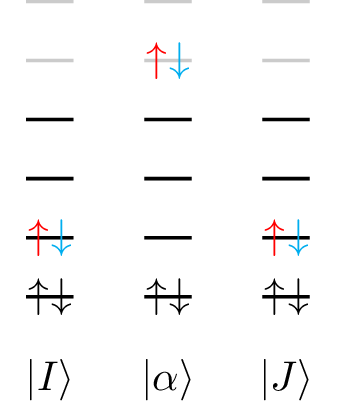

- : Jupyter_notebook.display_id = <abstr>


In [47]:
let _ = png_image "0_2_22.png"

$i,j$ : orbital indices of MOs   occupied in $|I\rangle$.

$\sum_i \sum_a \sum_j \sum_b \hat{T}_{ij}^{ab} \hat{T}_{ab}^{ij}$

\begin{align}
\sum_{a} \sum_{b>a} \sum_{i} \sum_{j<i}
            \langle i j || a b \rangle 
             \left[ a b || i j \right] + 
\sum_{a} \sum_{\bar{b}} \sum_{i} \sum_{\bar{j}}
            \langle i \bar{j} | a \bar{b} \rangle  
             \left[ a \bar{b} | i \bar{j} \right]  + \\
\sum_{\bar{a}} \sum_{b} \sum_{\bar{i}} \sum_{j}
            \langle \bar{i} j | \bar{a} b \rangle  
             \left[ \bar{a} b | \bar{i} j \right] + 
\sum_{\bar{a}} \sum_{\bar{b}>\bar{a}} \sum_{\bar{i}} \sum_{\bar{j}<\bar{i}}
            \langle \bar{i} \bar{j} || \bar{a} \bar{b} \rangle 
             \left[ \bar{a} \bar{b} || \bar{i} \bar{j} \right] 
\end{align}

In [48]:
let integral_value ki kj = 
   (* Alpha-Beta *)
   let s, s' = Spin.(Alfa, Beta) in
   sum  mos_cabs  (fun a -> 
   sum  mos_cabs  (fun b ->  
   sum (mos_a ki) (fun i ->  
   sum (mos_b ki) (fun j ->  
       h_two i j a b s s'  *. f_two a b i j s s'
   ))))
   +.
   (* Alpha-Alpha / Beta-Beta *)
   List.fold_left (fun accu (mos,s) -> 
     let s' = s in accu +.
     sum mos_cabs (fun b ->  
     sum mos_cabs (fun a -> if b > a then 0. else
     sum   mos    (fun j ->  
     sum   mos    (fun i -> if i < j then 0. else
        h_two i j a b s s'  *. f_two a b i j s s'
     ))))
   ) 0. [ (mos_a ki,Spin.Alfa) ; (mos_b ki,Spin.Beta)]
     
let _ =
  check 100 integral_value 0 2 2 2
    

val integral_value : Determinant.t -> 'a -> float = <fun>


Checking ... 
 -  10 %
 -  20 %
 -  30 %
 -  40 %
 -  50 %
 -  60 %
 -  70 %
 -  80 %
 -  90 %
 - 100 %
OK: (95, 95) | -1.697991e-02 -1.697991e-02 | 2.775558e-17  |  cpu : 3.329183  0.257722


- : unit = ()


In [49]:
let m_0222_Haa = 
  Mat.init_cols mo_num mo_num (fun i j ->
      sum mos_cabs (fun a ->
      sum mos_cabs (fun b -> if b >= a then 0. else
        h_two i j a b Spin.Alfa Spin.Alfa *. f_two a b i j Spin.Alfa Spin.Alfa
        ) )
     )
        
let m_0222_Hab = 
  Mat.init_cols mo_num mo_num (fun i j ->
      sum mos_cabs (fun a ->
      sum mos_cabs (fun b ->
        h_two i j a b Spin.Alfa Spin.Beta *. f_two a b i j Spin.Alfa Spin.Beta
        ) )
     )
      
let integral_value ki kj = 
   (* Alpha-Beta *)
   sum (mos_a ki) (fun i ->  
       sum (mos_b ki) (fun j ->  
          m_0222_Hab.{i,j}  
       ))
   +.
   (* Alpha-Alpha / Beta-Beta *)
   List.fold_left (fun accu (mos) -> 
     accu +.
     sum mos (fun j ->  
         sum mos (fun i -> if i < j then 0. else
           m_0222_Haa.{i,j}  
     ))
   ) 0. [ (mos_a ki) ; (mos_b ki)]
     
let _ =
  check 100 integral_value 0 2 2 2
    

val m_0222_Haa : Lacaml.D.mat =
  

             -- 1 --      -- 2 --      -- 3 --      -- 4 --      -- 5 --
        1              0  -1.0063E-05 -0.000334496 -0.000347188 -0.000267608
        2    -1.0063E-05            0  -0.00016695 -0.000173345 -0.000134367
        3   -0.000334496  -0.00016695            0  -0.00370788  -0.00334839
                     ...          ...          ...          ...          ...
        7   -0.000232416 -0.000151236 -0.000542986 -0.000572891  -2.9266E-05
        8   -4.11752E-05 -3.98219E-05 -0.000454591  -0.00047264 -0.000369248
        9   -0.000152836 -0.000112257 -0.000183496  -2.9266E-05 -0.000103812
  

             -- 6 --      -- 7 --      -- 8 --      -- 9 --
        1   -0.000165528 -0.000232416 -4.11752E-05 -0.000152836
        2   -0.000118652 -0.000151236 -3.98219E-05 -0.000112257
        3    -2.9266E-05 -0.000542986 -0.000454591 -0.000183496
                     ...          ...          ...          ...
        7    -0.00083789        

val m_0222_Hab : Lacaml.D.mat =
  

             -- 1 --      -- 2 --      -- 3 --      -- 4 --      -- 5 --
        1     -0.0026356 -8.37274E-05 -0.000318312 -0.000329372 -0.000258412
        2   -8.37274E-05  -0.00329888  -0.00055028  -0.00055898 -0.000498185
        3   -0.000318312  -0.00055028  -0.00651939  -0.00351919  -0.00318906
                     ...          ...          ...          ...          ...
        7   -0.000177876 -0.000280993 -0.000526737 -0.000561143 -0.000637823
        8   -7.32564E-05 -0.000232089  -0.00062993 -0.000653508 -0.000521154
        9   -0.000106915 -0.000220198 -0.000196607 -0.000319215 -0.000105067
  

             -- 6 --      -- 7 --      -- 8 --      -- 9 --
        1   -0.000117975 -0.000177876 -7.32564E-05 -0.000106915
        2   -0.000228899 -0.000280993 -0.000232089 -0.000220198
        3   -0.000355709 -0.000526737  -0.00062993 -0.000196607
                     ...          ...          ...          ...
        7    -0.00104342  -0.001

val integral_value : Determinant.t -> 'a -> float = <fun>


Checking ... 
 -  10 %
 -  20 %
 -  30 %
 -  40 %
 -  50 %
 -  60 %
 -  70 %
 -  80 %
 -  90 %
 - 100 %
OK: (58, 58) | -2.336186e-02 -2.336186e-02 | 3.122502e-17  |  cpu : 3.329266  0.000941


- : unit = ()


# 4. 1 1 11

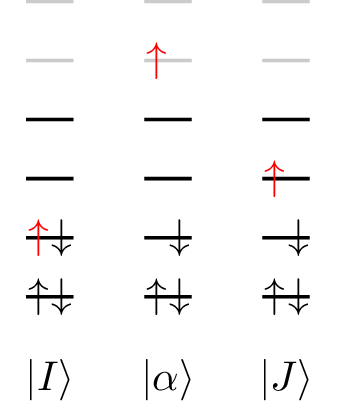

- : Jupyter_notebook.display_id = <abstr>


In [50]:
let _ = png_image "1_1_11.png"

$|J\rangle = \hat{T}_{i}^{k}|I\rangle$

$j$ : orbital indices of MOs occupied both in $|I\rangle$  and $|J\rangle$.

$\sum_a \hat{T}_{i}^{a} \hat{T}_{a}^{k}$

\begin{align}
    \sum_{a} 
    \left( h_{ia} +\sum_{j} \langle i j || a j \rangle +
    \sum_{\bar{j}} \langle i \bar{j} | a \bar{j} \rangle  \right)
    \left( f_{ak} +\sum_{j}  \left[ a j || k j \right] + 
    \sum_{\bar{j}}  \left[ a \bar{j} | k \bar{j} \right]\right) \\
\end{align}

In [51]:
let integral_value ki kj = 
    let i, k, s, phase =
          match Excitation.of_det ki kj with
          | Excitation.(Single (phase, { hole ; particle ; spin })) ->
            hole, particle, spin, phase
          | _ -> assert false
    in

    let mos_i, mos_i' =
      match s with
      | Spin.Alfa -> mos_a ki, mos_b ki
      | Spin.Beta -> mos_b ki, mos_a ki
    in
    let mos_j, mos_j' =
      match s with
      | Spin.Alfa -> mos_a kj, mos_b kj
      | Spin.Beta -> mos_b kj, mos_a kj
    in

    let result = 
       let s' = Spin.other s in
       
       sum mos_cabs (fun a -> 
           (h_one i a s +. 
              sum mos_i  (fun j ->  h_two i j a j s s ) +.
              sum mos_i' (fun j ->  h_two i j a j s s') ) *.
           (f_one a k s +. 
              sum mos_j  (fun j ->  f_two a j k j s s ) +.
              sum mos_j' (fun j ->  f_two a j k j s s') )  
         )
    in
    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
     

let _ = check 0 integral_value 1 1 1 1

val integral_value : Determinant.t -> Determinant.t -> float = <fun>


Checking ... 
 -  10 %
 -  20 %
 -  30 %
 -  40 %
 -  50 %
 -  60 %
 -  70 %
 -  80 %
 -  90 %
 - 100 %
OK: (0, 0) | 0.000000e+00 0.000000e+00 | 0.000000e+00  |  cpu : 4.151429  1.045428


- : unit = ()


In [ ]:
let ki = det_I.(77)
let kj = det_I.(83)

let _ = integral_value ki kj

In [ ]:
let m_1111_1H_1F = 
  Mat.init_cols mo_num mo_num (fun i k -> 
        sum mos_cabs (fun a ->
            h_one i a Spin.Alfa *. f_one a k Spin.Alfa ))


let m_1111_1H_2Fa = 
  array_3_init mo_num mo_num mo_num (fun i j k ->
      sum mos_cabs (fun a ->
        h_one i a Spin.Alfa *. f_two a j k j Spin.Alfa Spin.Alfa ))

    
let m_1111_1H_2Fb = 
  array_3_init mo_num mo_num mo_num (fun i j k ->
      sum mos_cabs (fun a ->
        h_one i a Spin.Alfa *. f_two a j k j Spin.Alfa Spin.Beta ))


let m_1111_2Ha_1F = 
  array_3_init mo_num mo_num mo_num (fun i j k ->
   sum mos_cabs (fun a ->
    h_two i j a j Spin.Alfa Spin.Alfa *. f_one a k Spin.Alfa ))

    
let m_1111_2Hb_1F = 
  array_3_init mo_num mo_num mo_num (fun i j k ->
   sum mos_cabs (fun a ->
    h_two i j a j Spin.Alfa Spin.Beta *. f_one a k Spin.Alfa ))


let m_1111_2Ha_2Fa =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k l ->
    sum mos_cabs (fun a ->
      h_two i j a j Spin.Alfa Spin.Alfa *.
      f_two a l k l Spin.Alfa Spin.Alfa 
    )
  )


let m_1111_2Hb_2Fa =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k l ->
    sum mos_cabs (fun a ->
      h_two i j a j Spin.Alfa Spin.Beta *.
      f_two a l k l Spin.Alfa Spin.Alfa 
    )
  )


let m_1111_2Ha_2Fb =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k l ->
    sum mos_cabs (fun a ->
      h_two i j a j Spin.Alfa Spin.Alfa *.
      f_two a l k l Spin.Alfa Spin.Beta 
    )
  )


let m_1111_2Hb_2Fb =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k l ->
    sum mos_cabs (fun a ->
      h_two i j a j Spin.Alfa Spin.Beta *.
      f_two a l k l Spin.Alfa Spin.Beta 
    )
  )


let integral_value_11 ki kj = 
    let i, k, s, phase =
          match Excitation.of_det ki kj with
          | Excitation.(Single (phase, { hole ; particle ; spin })) ->
            hole, particle, spin, phase
          | _ -> assert false
    in
    
    let mos_a, mos_b =
      match s with
      | Spin.Alfa -> mos_a ki, mos_b ki
      | Spin.Beta -> mos_b ki, mos_a ki
    in    
   
    let result = 
     m_1111_1H_1F.{i,k} +. 
     sum mos_a (fun j -> if j = i then 0. else
       m_1111_1H_2Fa.{i,j,k} +. m_1111_2Ha_1F.{i,j,k} +.
       sum mos_a (fun l -> if l = i then 0. else m_1111_2Ha_2Fa.{i,j,k,l}) +.
       sum mos_b (fun l -> m_1111_2Ha_2Fb.{i,j,k,l})) +.
     sum mos_b (fun j ->
       m_1111_1H_2Fb.{i,j,k} +. m_1111_2Hb_1F.{i,j,k} +.
       sum mos_a (fun l -> if l = i then 0. else m_1111_2Hb_2Fa.{i,j,k,l}) +.
       sum mos_b (fun l -> m_1111_2Hb_2Fb.{i,j,k,l}))
    in
    
    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
    
let _ =
  check 0 integral_value_11 1 1 1 1
    

# 5. 1 1 12

In [ ]:
let _ = png_image "1_1_12.png"

$|J\rangle = \hat{T}_{i}^{k}|I\rangle$

$\sum_{j} \sum_a \hat{T}_{j}^{a} \hat{T}_{ai}^{jk}$

$j$ : orbital indices of MOs occupied both in $|I\rangle$  and $|J\rangle$.

\begin{align}
    \sum_{a} \sum_{j} 
    \left( h_{ja} +\sum_{m} \langle j m || a m \rangle +
    \sum_{\bar{m}} \langle j \bar{m} | a \bar{m} \rangle  \right)
    \left[ a i || j k \right] + \\
    \sum_{\bar{a}} \sum_{\bar{j}} 
    \left( h_{\bar{j}\bar{a}} +\sum_{m} \langle \bar{j} m | \bar{a} m \rangle +
    \sum_{\bar{m}} \langle \bar{j} \bar{m} || \bar{a} \bar{m} \rangle  \right)
    \left[ \bar{a} i | \bar{j} k \right] 
\end{align}

In [ ]:
let integral_value ki kj = 
    let i, k, s, phase =
          match Excitation.of_det ki kj with
          | Excitation.(Single (phase, { hole ; particle ; spin })) ->
            hole, particle, spin, phase
          | _ -> assert false
    in

    let mos_j, mos_j' =
      let alfa = 
        let i = Spindeterminant.bitstring @@ Determinant.alfa ki in
        let j = Spindeterminant.bitstring @@ Determinant.alfa kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      let beta  = 
        let i = Spindeterminant.bitstring @@ Determinant.beta ki in
        let j = Spindeterminant.bitstring @@ Determinant.beta kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      match s with
      | Spin.Alfa -> alfa, beta
      | Spin.Beta -> beta, alfa
    in
    
    let mos_i, mos_i' =
      match s with
      | Spin.Alfa -> mos_a ki, mos_b ki
      | Spin.Beta -> mos_b ki, mos_a ki
    in

    let result = 
       let s' = Spin.other s in
       sum mos_cabs (fun a -> 
           sum mos_j (fun j -> 
               (h_one j a s +. 
                  sum mos_i  (fun m -> h_two j m a m s s )  +.
                  sum mos_i' (fun m -> h_two j m a m s s')  ) *.
               (f_two a i j k s s )
             ) 
           +.
           sum mos_j' (fun j -> 
               (h_one j a s +. 
                  sum mos_i  (fun m ->  h_two j m a m s' s ) +.
                  sum mos_i' (fun m ->  h_two j m a m s' s') ) *.
               (f_two a i j k s' s )
             ) 
         ) 
    in
    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
     

let _ = check 100 integral_value 1 1 1 2

In [ ]:
let m_1112_1H_2Fa = 
  array_3_init mo_num mo_num mo_num (fun i j k ->
      sum mos_cabs (fun a ->
        h_one j a Spin.Alfa *. f_two a i j k Spin.Alfa Spin.Alfa ))

    
let m_1112_1H_2Fb = 
  array_3_init mo_num mo_num mo_num (fun i j k ->
      sum mos_cabs (fun a ->
        h_one j a Spin.Beta *. f_two a i j k Spin.Alfa Spin.Beta ))


let m_1112_2Ha_2Fa =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k m ->
    sum mos_cabs (fun a ->
      h_two j m a m Spin.Alfa Spin.Alfa *.
      f_two a i j k Spin.Alfa Spin.Alfa 
    )
  )


let m_1112_2Hb_2Fa =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k m ->
    sum mos_cabs (fun a ->
      h_two j m a m Spin.Alfa Spin.Beta *.
      f_two a i j k Spin.Alfa Spin.Alfa 
    )
  )

let m_1112_2Ha_2Fb =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k m ->
    sum mos_cabs (fun a ->
      h_two j m a m Spin.Alfa Spin.Alfa *.
      f_two a i j k Spin.Alfa Spin.Beta 
    )
  )


let m_1112_2Hb_2Fb =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k m ->
    sum mos_cabs (fun a ->
      h_two j m a m Spin.Alfa Spin.Beta *.
      f_two a i j k Spin.Alfa Spin.Beta 
    )
  )


let integral_value_12 ki kj = 
    let i, k, s, phase =
          match Excitation.of_det ki kj with
          | Excitation.(Single (phase, { hole ; particle ; spin })) ->
            hole, particle, spin, phase
          | _ -> assert false
    in
    
    let mos_j, mos_j' =
      let alfa = 
        let i = Spindeterminant.bitstring @@ Determinant.alfa ki in
        let j = Spindeterminant.bitstring @@ Determinant.alfa kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      let beta  = 
        let i = Spindeterminant.bitstring @@ Determinant.beta ki in
        let j = Spindeterminant.bitstring @@ Determinant.beta kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      match s with
      | Spin.Alfa -> alfa, beta
      | Spin.Beta -> beta, alfa
    in
    
    let mos_i, mos_i' =
      match s with
      | Spin.Alfa -> mos_a ki, mos_b ki
      | Spin.Beta -> mos_b ki, mos_a ki
    in
   
    let result = 
     sum mos_j (fun j -> 
       m_1112_1H_2Fa.{i,j,k} +. 
       sum mos_i  (fun m -> m_1112_2Ha_2Fa.{i,j,k,m}) +.
       sum mos_i' (fun m -> m_1112_2Hb_2Fa.{i,j,k,m})) +.
     sum mos_j' (fun j ->
       m_1112_1H_2Fb.{i,j,k} +. 
       sum mos_i  (fun m -> m_1112_2Hb_2Fb.{i,j,k,m}) +.
       sum mos_i' (fun m -> m_1112_2Ha_2Fb.{i,j,k,m}))
    in
    
    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
   
   

let _ = check 100 integral_value_12 1 1 1 2

# 6. 1 1 21

In [ ]:
let _ = png_image "1_1_21.png"

$|J\rangle = \hat{T}_{i}^{k}|I\rangle$

$\sum_{j} \sum_a \hat{T}_{ij}^{ka} \hat{T}_{a}^{j}$

$j$ : orbital indices of MOs occupied both in $|I\rangle$  and $|J\rangle$.

\begin{align}
    \sum_{a} \sum_{j} 
    \langle i j || k a \rangle 
    \left( f_{aj} +\sum_{m} \left[ m a || m j \right] +
    \sum_{\bar{m}} \left[ \bar{m} a | \bar{m} j \right] \right) + \\
    \sum_{\bar{a}} \sum_{\bar{j}} 
    \langle i \bar{j} | k \bar{a} \rangle
    \left( f_{\bar{a}\bar{j}} +\sum_{m} \left[ m \bar{a} | m \bar{j} \right] +
    \sum_{\bar{m}} \left[ \bar{m} \bar{a} || \bar{m} \bar{j} \right]  \right)
\end{align}

In [ ]:
let integral_value ki kj = 
    let i, k, s, phase =
          match Excitation.of_det ki kj with
          | Excitation.(Single (phase, { hole ; particle ; spin })) ->
            hole, particle, spin, phase
          | _ -> assert false
    in

    let mos_j, mos_j' =
      let alfa = 
        let i = Spindeterminant.bitstring @@ Determinant.alfa ki in
        let j = Spindeterminant.bitstring @@ Determinant.alfa kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      let beta  = 
        let i = Spindeterminant.bitstring @@ Determinant.beta ki in
        let j = Spindeterminant.bitstring @@ Determinant.beta kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      match s with
      | Spin.Alfa -> alfa, beta
      | Spin.Beta -> beta, alfa
    in
    
    let mos_i, mos_i' =
      match s with
      | Spin.Alfa -> mos_a kj, mos_b kj
      | Spin.Beta -> mos_b kj, mos_a kj
    in

    let result = 
       let s' = Spin.other s in
       sum mos_cabs (fun a -> 
       sum mos_j    (fun j -> 
               (h_two i j k a s s ) *.
               (f_one a j s  +. 
                  sum mos_i  (fun m -> f_two m a m j s  s) +.
                  sum mos_i' (fun m -> f_two m a m j s' s) ) 
             ) 
       +.
       sum mos_j' (fun j -> 
               (h_two i j k a s s') *.
               (f_one a j s' +. 
                  sum mos_i  (fun m -> f_two m a m j s  s') +.
                  sum mos_i' (fun m -> f_two m a m j s' s') ) 
       )) 
    in
    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
     

let _ = check 100 integral_value 1 1 2 1

In [ ]:
let m_1121_2Ha_1F = 
  array_3_init mo_num mo_num mo_num (fun i j k ->
      sum mos_cabs (fun a ->
        h_two i j k a Spin.Alfa Spin.Alfa *. f_one a j Spin.Alfa))

    
let m_1121_2Hb_1F = 
  array_3_init mo_num mo_num mo_num (fun i j k ->
      sum mos_cabs (fun a ->
        h_two i j k a Spin.Alfa Spin.Beta *. f_one a j Spin.Beta))


let m_1121_2Ha_2Fa =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k m ->
    sum mos_cabs (fun a ->
      h_two i j k a Spin.Alfa Spin.Alfa *.
      f_two m a m j Spin.Alfa Spin.Alfa 
    )
  )


let m_1121_2Hb_2Fa =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k m ->
    sum mos_cabs (fun a ->
      h_two i j k a Spin.Alfa Spin.Beta *.
      f_two m a m j Spin.Alfa Spin.Alfa 
    )
  )

let m_1121_2Ha_2Fb =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k m ->
    sum mos_cabs (fun a ->
      h_two i j k a Spin.Alfa Spin.Alfa *.
      f_two m a m j Spin.Alfa Spin.Beta 
    )
  )


let m_1121_2Hb_2Fb =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k m ->
    sum mos_cabs (fun a ->
      h_two i j k a Spin.Alfa Spin.Beta *.
      f_two m a m j Spin.Alfa Spin.Beta 
    )
  )


let integral_value_21 ki kj = 
    let i, k, s, phase =
          match Excitation.of_det ki kj with
          | Excitation.(Single (phase, { hole ; particle ; spin })) ->
            hole, particle, spin, phase
          | _ -> assert false
    in
    
    let mos_j, mos_j' =
      let alfa = 
        let i = Spindeterminant.bitstring @@ Determinant.alfa ki in
        let j = Spindeterminant.bitstring @@ Determinant.alfa kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      let beta  = 
        let i = Spindeterminant.bitstring @@ Determinant.beta ki in
        let j = Spindeterminant.bitstring @@ Determinant.beta kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      match s with
      | Spin.Alfa -> alfa, beta
      | Spin.Beta -> beta, alfa
    in
    
    let mos_i, mos_i' =
      match s with
      | Spin.Alfa -> mos_a kj, mos_b kj
      | Spin.Beta -> mos_b kj, mos_a kj
    in
   
    let result = 
     sum mos_j (fun j -> 
       m_1121_2Ha_1F.{i,j,k} +. 
       sum mos_i  (fun m -> m_1121_2Ha_2Fa.{i,j,k,m}) +.
       sum mos_i' (fun m -> m_1121_2Ha_2Fb.{i,j,k,m})) +.
     sum mos_j' (fun j ->
       m_1121_2Hb_1F.{i,j,k} +. 
       sum mos_i  (fun m -> m_1121_2Hb_2Fb.{i,j,k,m}) +.
       sum mos_i' (fun m -> m_1121_2Hb_2Fa.{i,j,k,m}))
    in
    
    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
   
   

let _ = check 100 integral_value_21 1 1 2 1

# 7. 1 1 22

In [ ]:
let _ = png_image "1_1_22.png"

$|J\rangle = \hat{T}_{i}^{k}|I\rangle$

$\sum_{j} \sum_{a} \sum_{m}
    \hat{T}_{ij}^{ma} \hat{T}_{ma}^{kj} - 
    \hat{T}_{lj}^{ka} \hat{T}_{ia}^{lj} + \\
\sum_{\bar{j}} \sum_{\bar{a}} \sum_{m}
    \hat{T}_{i\bar{j}}^{m\bar{a}} \hat{T}_{m\bar{a}}^{k\bar{j}} - 
    \hat{T}_{l\bar{j}}^{k\bar{a}} \hat{T}_{i\bar{a}}^{l\bar{j}} +
\sum_{\bar{j}} \sum_{a} \sum_{\bar{m}}
    \hat{T}_{i\bar{j}}^{a\bar{m}} \hat{T}_{a\bar{m}}^{k\bar{j}} 
$

$j,l$ : orbital indices of MOs occupied both in $|I\rangle$  and $|J\rangle$.

$m$ : orbital indices of virtual MOs, unoccupied both in $|I\rangle$  and $|J\rangle$.

$a$ : orbital indices of CABS MOs

\begin{align}
    \sum_{a} \sum_{j} \sum_{m}
      \langle i j || m a \rangle  \left[ m a || k j \right]  - \\
    \sum_{a} \sum_{j} \sum_{l}
      \langle l j || k a \rangle  \left[ i a || l j \right]  + \\
    \sum_{\bar{a}} \sum_{\bar{j}} \sum_{m}
      \langle i \bar{j} | m \bar{a} \rangle  \left[ m \bar{a} | k \bar{j} \right]  + \\
    \sum_{\bar{a}} \sum_{\bar{j}} \sum_{l}
      \langle l \bar{j} | k \bar{a} \rangle  \left[ i \bar{a} | l \bar{j} \right] - \\
    \sum_{\bar{a}} \sum_{\bar{j}} \sum_{\bar{m}}
      \langle i \bar{j} | a \bar{m} \rangle  \left[ a \bar{m} | k \bar{j} \right]  
\end{align}

In [ ]:
(*
let ki = det_I.(6)
let kj = det_I.(58)

let _ = 
    Format.printf "|I> -> |J> : %a |\n@." Excitation.pp (Excitation.of_det ki kj) ;
generate_alphas ki kj 1 1 2 2
|> Array.of_list
|> Array.mapi (fun kk alpha -> 

(*
let _ = Determinant.to_lists ki
let _ = Determinant.to_lists alpha
let _ = Determinant.to_lists kj

   
let _ = 
    Format.printf "|I> -> |J> : %a\n@." Excitation.pp (Excitation.of_det ki kj);
    Format.printf "|I> -> |a> : %a\n@." Excitation.pp (Excitation.of_det ki alpha);
    Format.printf "|a> -> |J> : %a\n@." Excitation.pp (Excitation.of_det alpha kj)
*)

    let integral_value ki kj = 
    
      let exc0 = Array.init (aux_num+1) (fun _ -> [|"-";"-"|]) in
      let exc1 = Array.init (aux_num+1) (fun _ -> [|"-";"-"|]) in 
      let exc2 = Array.init (aux_num+1) (fun _ -> [|"-";"-"|]) in 
 
      let i, k, s, phase =
          match Excitation.of_det ki kj with
          | Excitation.(Single (phase, { hole ; particle ; spin } )) ->
            hole, particle, spin, phase
          | _ -> assert false
      in
      let spin = function
        | Spin.Alfa -> 0
        | _ -> 1
      in
        exc0.(i).(spin s ) <- "i" 
      ; exc0.(k).(spin s ) <- "k" 
      ;
      let s0 = s in
    
      let i, j, k, l, s, s', p1 =
          match Excitation.of_det ki alpha with
          | Excitation.(Double (phase, { hole ; particle ; spin }, {hole=hole' ; particle=particle' ; spin=spin' })) ->
            hole, hole', particle, particle', spin, spin', phase
          | _ -> assert false
      in
      
      if exc0.(i).(spin s ) =  "-" then exc0.(i).(spin s ) <- "n";
      if exc0.(j).(spin s') =  "-" then exc0.(j).(spin s') <- "n";
      if exc0.(k).(spin s ) =  "-" then exc0.(k).(spin s ) <- if k > mo_num then "a" else "m";
      if exc0.(l).(spin s') =  "-" then exc0.(l).(spin s') <- if l > mo_num then "a" else "m";
      
      let string_h = 
          Printf.sprintf "h_two %s %s %s %s %s %s *.  " 
            exc0.(i).(spin s )
            exc0.(j).(spin s')
            exc0.(k).(spin s )
            exc0.(l).(spin s')
            (if s  = s0 then "s " else "s'")
            (if s' = s0 then "s " else "s'")
            (*
            (if exc0.(i).(spin s ) = "i" || exc0.(k).(spin s ) = "k" then "s  " else 
             if exc0.(i).(spin s ) = "j" || exc0.(k).(spin s ) = "l" then "s' " else "s''")
            (if exc0.(j).(spin s') = "i" || exc0.(l).(spin s') = "k" then "s  " else 
             if exc0.(j).(spin s') = "j" || exc0.(l).(spin s') = "l" then "s' " else "s''")
             *)
      in 
      
      let i, j, k, l, s, s', p2 =
          match Excitation.of_det alpha kj with
          | Excitation.(Double (phase, { hole ; particle ; spin }, {hole=hole' ; particle=particle' ; spin=spin' })) ->
            hole, hole', particle, particle', spin, spin', phase
          | _ -> assert false
      in
      
      let string_f = 
          Printf.sprintf "f_two %s %s %s %s %s %s" 
            exc0.(i).(spin s )
            exc0.(j).(spin s')
            exc0.(k).(spin s )
            exc0.(l).(spin s')
            (*
            (if exc0.(i).(spin s ) = "i" || exc0.(k).(spin s ) = "k" then "s  " else 
             if exc0.(i).(spin s ) = "j" || exc0.(k).(spin s ) = "l" then "s' " else 
             if exc0.(i).(spin s ) = "n" || exc0.(k).(spin s ) = "n" then "s''" else
             if s  = s0 then "s" else "s'")
            (if exc0.(j).(spin s') = "i" || exc0.(l).(spin s') = "k" then "s  " else 
             if exc0.(j).(spin s') = "j" || exc0.(l).(spin s') = "l" then "s' " else 
             if exc0.(j).(spin s') = "n" || exc0.(l).(spin s') = "n" then "s''" else
             if s' = s0 then "s" else "s'")
             *)
            (if s  = s0 then "s " else "s'")
            (if s' = s0 then "s " else "s'")
      in
      
    Format.printf "|I> -> |a> : %a | %s\n@." Excitation.pp (Excitation.of_det ki alpha) string_h ;
    Format.printf "|a> -> |J> : %a | %s\n@." Excitation.pp (Excitation.of_det alpha kj) string_f ;
    
    let sign = 
        if Phase.add p1 p2 = phase then "+. " else "-. "
    in
sign ^ string_h ^ string_f
(*
        
        let mos, mos' =
          match s with
          | Spin.Alfa -> mos_a ki, mos_b ki
          | Spin.Beta -> mos_b ki, mos_a ki
        in

        let result = 
           let k=4 and l=5 in
           let i=1 and j=2 in
           let n=2 and a=7 in
           let s   = Spin.Alfa
           and s'  = Spin.Alfa
           and s'' = Spin.Beta
           in
           (* 
           h_two j n l a s' s'' *. f_two a i n k s s''
           *)
           h_two i n k a s s'' *. f_two j a l n s s''
        in

        match phase with
        | Phase.Pos -> result
        | Phase.Neg -> -. result
        *)

in
integral_value ki kj
(*
let a = (compute_HaaF ki [alpha] kj)
and b = (integral_value ki kj)
in
if kk = 31 then
    Format.printf "%6d %e %e@.@." (kk) a b
    *)
)
|> Array.to_list
|> List.sort_uniq compare

let _ = compute_HaaF ki (generate_alphas ki kj 1 1 2 2) kj

let _ = integral_value ki kj

*)

In [ ]:
let integral_value ki kj = 
    let i, k, s, phase =
          match Excitation.of_det ki kj with
          | Excitation.(Single (phase, { hole ; particle ; spin })) ->
            hole, particle, spin, phase
          | _ -> assert false
    in
    
   (* MOs unoccupied in both I and J *)
   let mos_virt_a, mos_virt_b = 
     Array.init mo_num (fun i -> Some (i+1)) , 
     Array.init mo_num (fun i -> Some (i+1)) 
   in
   List.iter (fun i -> mos_virt_a.(i-1) <- None) (mos_a ki);
   List.iter (fun i -> mos_virt_a.(i-1) <- None) (mos_a kj);
   List.iter (fun i -> mos_virt_b.(i-1) <- None) (mos_b ki);
   List.iter (fun i -> mos_virt_b.(i-1) <- None) (mos_b kj);
   
   let mos_virt_a, mos_virt_b = 
     Array.to_list mos_virt_a |> Util.list_some,
     Array.to_list mos_virt_b |> Util.list_some
   in

   let mos_virt, mos_virt' =
      match s with
      | Spin.Alfa -> mos_virt_a, mos_virt_b
      | Spin.Beta -> mos_virt_b, mos_virt_a
   in
    
   let mos_j, mos_j' =
      let alfa = 
        let i = Spindeterminant.bitstring @@ Determinant.alfa ki in
        let j = Spindeterminant.bitstring @@ Determinant.alfa kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      let beta  = 
        let i = Spindeterminant.bitstring @@ Determinant.beta ki in
        let j = Spindeterminant.bitstring @@ Determinant.beta kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      match s with
      | Spin.Alfa -> alfa, beta
      | Spin.Beta -> beta, alfa
   in
   let result = 
       let s' = Spin.other s in
        sum mos_cabs (fun a -> 
        sum mos_j    (fun n -> 
        sum mos_virt (fun m -> 
             h_two n i a m s  s  *.  f_two m a k n s  s 
        ))) +.
        sum mos_cabs (fun a' -> 
        sum mos_j'   (fun n' -> 
        sum mos_virt (fun m -> 
             h_two i n' m a' s  s' *.  f_two m a' k n' s  s'
        ))) +.
        sum mos_cabs  (fun a -> 
        sum mos_j'    (fun n' -> 
        sum mos_virt' (fun m' -> 
             h_two i n' a m' s  s' *.  f_two a m' k n' s  s'
        ))) -. 
        sum mos_cabs (fun a -> 
        sum mos_j    (fun n -> 
        sum mos_j    (fun l -> if l <=n then 0. else
             h_two n l a k s  s  *.  f_two i a l n s  s 
        ))) -.  
        sum mos_cabs (fun a' -> 
        sum mos_j'   (fun n' -> 
        sum mos_j    (fun l -> 
             h_two l n' k a' s s'  *.  f_two i a' l n' s s'
        ))) 
    in
    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
     
let _ = check 100 integral_value 1 1 2 2



In [ ]:
let m_1122_va =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k m ->
    sum mos_cabs (fun a ->
      h_two j i a m Spin.Alfa Spin.Alfa *.
      f_two m a k j Spin.Alfa Spin.Alfa 
    )
  )

let m_1122_v2 =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k m ->
    sum mos_cabs (fun a ->
      h_two i j m a Spin.Alfa Spin.Beta *.
      f_two m a k j Spin.Alfa Spin.Beta 
    )
  )

let m_1122_v3 =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k m ->
    sum mos_cabs (fun a ->
      h_two i j a m Spin.Alfa Spin.Beta *.
      f_two a m k j Spin.Alfa Spin.Beta 
    )
  )

let m_1122_oa =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k l ->
    sum mos_cabs (fun a ->
      h_two j l a k Spin.Alfa Spin.Alfa *.
      f_two i a l j Spin.Alfa Spin.Alfa 
    )
  )

let m_1122_o =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k l ->
    sum mos_cabs (fun a ->
      h_two l j k a Spin.Alfa Spin.Beta *.
      f_two i a l j Spin.Alfa Spin.Beta 
    )
  )


let integral_value_22 ki kj = 
    let i, k, s, phase =
          match Excitation.of_det ki kj with
          | Excitation.(Single (phase, { hole ; particle ; spin })) ->
            hole, particle, spin, phase
          | _ -> assert false
    in
    
   (* MOs unoccupied in both I and J *)
   let mos_virt_a, mos_virt_b = 
     Array.init mo_num (fun i -> Some (i+1)) , 
     Array.init mo_num (fun i -> Some (i+1)) 
   in
   List.iter (fun i -> mos_virt_a.(i-1) <- None) (mos_a ki);
   List.iter (fun i -> mos_virt_a.(i-1) <- None) (mos_a kj);
   List.iter (fun i -> mos_virt_b.(i-1) <- None) (mos_b ki);
   List.iter (fun i -> mos_virt_b.(i-1) <- None) (mos_b kj);
   
   let mos_virt_a, mos_virt_b = 
     Array.to_list mos_virt_a |> Util.list_some,
     Array.to_list mos_virt_b |> Util.list_some
   in

   let mos_virt, mos_virt' =
      match s with
      | Spin.Alfa -> mos_virt_a, mos_virt_b
      | Spin.Beta -> mos_virt_b, mos_virt_a
   in
    
   let mos_j, mos_j' =
      let alfa = 
        let i = Spindeterminant.bitstring @@ Determinant.alfa ki in
        let j = Spindeterminant.bitstring @@ Determinant.alfa kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      let beta  = 
        let i = Spindeterminant.bitstring @@ Determinant.beta ki in
        let j = Spindeterminant.bitstring @@ Determinant.beta kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      match s with
      | Spin.Alfa -> alfa, beta
      | Spin.Beta -> beta, alfa
   in
   
    let result = 
        sum mos_j    (fun j -> 
        sum mos_virt (fun m -> 
          m_1122_va.{i,j,k,m}
        )) +.
        sum mos_j'   (fun j -> 
        sum mos_virt (fun m -> 
          m_1122_v2.{i,j,k,m}
        ))   +.
        
        sum mos_j'    (fun j -> 
        sum mos_virt' (fun m -> 
          m_1122_v3.{i,j,k,m}
        ))   -.
        sum mos_j    (fun j -> 
        sum mos_j    (fun l -> if l <= j then 0. else
          m_1122_oa.{i,j,k,l}
        )) -. 
        sum mos_j'   (fun j -> 
        sum mos_j    (fun l -> 
          m_1122_o.{i,j,k,l}
        )) 
    in
    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
     

let _ = check 100 integral_value_22 1 1 2 2




In [ ]:
let ki = det_I.(77) and kj = det_I.(83)

let _ =
integral_value_11 ki kj
+. integral_value_12 ki kj
+. integral_value_21 ki kj
+. integral_value_22 ki kj 

# 8. 1 2 22

In [ ]:
let _ = png_image "1_2_22.png"

$|J\rangle = \hat{T}_{i}^{k}|I\rangle$

$j$ : orbital indices of MOs occupied both in $|I\rangle$  and $|J\rangle$.

$\sum_{j} \sum_{a} \sum_{b}
    \hat{T}_{ij}^{ab} \hat{T}_{ab}^{kj} +
\sum_{\bar{j}} \sum_{a} \sum_{\bar{b}}
    \hat{T}_{i\bar{j}}^{a\bar{b}} \hat{T}_{a\bar{b}}^{k\bar{j}} 
$


$$
\sum_{j} \sum_{b}\sum_{a<b}
    \langle i j || a b \rangle \left[ ab || kj \right] + 
\sum_{\bar{j}} \sum_{\bar{b}}\sum_{a}
    \langle i \bar{j} | a \bar{b} \rangle \left[ a \bar{b} | k \bar{j} \right] 
$$

In [ ]:
let integral_value ki kj = 
    let h, p, s, phase =
          match Excitation.of_det ki kj with
          | Excitation.(Single (phase, { hole ; particle ; spin })) ->
            hole, particle, spin, phase
          | _ -> assert false
    in

    let mos, mos' =
      match s with
      | Spin.Alfa -> mos_a ki, mos_b ki
      | Spin.Beta -> mos_b ki, mos_a ki
    in
   
   

    let result = 
       (* Alpha-Beta *)
       let s' = Spin.other s in
       sum mos_cabs (fun b -> 
       sum mos_cabs (fun a -> 
       sum mos'     (fun j -> h_two h j a b s s'  *. f_two a b p j s s')
       ))
       +.
       (* Alpha-Alpha / Beta-Beta *)
       sum mos_cabs (fun b -> 
       sum mos_cabs (fun a -> if b >= a then 0. else
       sum mos  (fun j -> h_two h j a b s s  *. f_two a b p j s s)
       )) 
    in
    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
     

let _ = check 100 integral_value 1 2 2 2

In [ ]:
let m_1222a =
  array_3_init mo_num mo_num mo_num (fun i j k ->
    sum mos_cabs (fun a ->
    sum mos_cabs (fun b -> if b > a then 0. else
      h_two i j a b Spin.Alfa Spin.Alfa *.
      f_two a b k j Spin.Alfa Spin.Alfa 
    )
    )
  )

let m_1222 =
  array_3_init mo_num mo_num mo_num (fun i j k ->
    sum mos_cabs (fun a ->
    sum mos_cabs (fun b ->
      h_two i j a b Spin.Alfa Spin.Beta *.
      f_two a b k j Spin.Alfa Spin.Beta 
    )
    )
  )
  

let integral_value ki kj = 
    let i, k, s, phase =
          match Excitation.of_det ki kj with
          | Excitation.(Single (phase, { hole ; particle ; spin })) ->
            hole, particle, spin, phase
          | _ -> assert false
    in
    
   (* MOs unoccupied in both I and J *)
    let mos_j, mos_j' =
      let alfa = 
        let i = Spindeterminant.bitstring @@ Determinant.alfa ki in
        let j = Spindeterminant.bitstring @@ Determinant.alfa kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      let beta  = 
        let i = Spindeterminant.bitstring @@ Determinant.beta ki in
        let j = Spindeterminant.bitstring @@ Determinant.beta kj in
        Bitstring.to_list (Bitstring.logand i j)
      in
      match s with
      | Spin.Alfa -> alfa, beta
      | Spin.Beta -> beta, alfa
    in

    let result = 
        sum mos_j    (fun j ->  m_1222a.{i,j,k} ) +.
        sum mos_j'   (fun j ->  m_1222.{i,j,k} )
    in
    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
     

let _ = check 100 integral_value 1 2 2 2




# 9. 2 1 12

In [ ]:
let _ = png_image "2_1_12.png"

$|J\rangle = \hat{T}_{ij}^{kl}|I\rangle$

$m$ : orbital indices of MOs unoccupied both in $|I\rangle$  and $|J\rangle$.

$n$ : orbital indices of MOs occupied in $|I\rangle$

$\sum_{a} 
    \hat{T}_{i}^{a} \hat{T}_{aj}^{kl} +
    \hat{T}_{j}^{a} \hat{T}_{ia}^{kl} 
$


$$
\sum_{a}
    \left( h_{ia} + \sum_{n} \langle i n || a n \rangle + \sum_{\bar{n}} \langle i \bar{n} | a \bar{n} \rangle \right) \left[ a j || k l \right] + \\
\sum_{a}
    \left( h_{ja} + \sum_{n} \langle j n || a n \rangle + \sum_{\bar{n}} \langle j \bar{n} | a \bar{n} \rangle \right) \left[ i a || k l \right] 
$$

In [ ]:
let integral_value ki kj = 
    let i, j, k, l, s, s', phase =
          match Excitation.of_det ki kj with
          | Excitation.(Double (phase, { hole ; particle ; spin }, {hole=hole' ; particle=particle' ; spin=spin' })) ->
            hole, hole', particle, particle', spin, spin', phase
          | _ -> assert false
    in

        let mos, mos' =
          match s with
          | Spin.Alfa -> mos_a ki, mos_b ki
          | Spin.Beta -> mos_b ki, mos_a ki
        in
        
        let mos2, mos2' =
          match s' with
          | Spin.Alfa -> mos_a ki, mos_b ki
          | Spin.Beta -> mos_b ki, mos_a ki
        in

        let result = 
       sum mos_cabs (fun a -> 
           let s'' = Spin.other s in
             ( h_one i a s +.
               sum mos  (fun n -> h_two i n a n s s  ) +.
               sum mos' (fun n -> h_two i n a n s s'') 
             ) *. f_two a j k l s s'
             ) +.
       sum mos_cabs (fun a -> 
           let s'' = Spin.other s' in
             ( h_one j a s' +.
               sum mos2 (fun n -> h_two j n a n s' s' ) +.
               sum mos2'  (fun n -> h_two j n a n s' s'') 
             ) *. f_two i a k l s s'
             ) 
        in

        match phase with
        | Phase.Pos -> result
        | Phase.Neg -> -. result


let _ = check 100 integral_value 2 1 1 2


$|J\rangle = \hat{T}_{ij}^{kl}|I\rangle$

$m$ : orbital indices of MOs unoccupied both in $|I\rangle$  and $|J\rangle$.

$n$ : orbital indices of MOs occupied in $|I\rangle$

$\sum_{a} 
    \hat{T}_{i}^{a} \hat{T}_{aj}^{kl} +
    \hat{T}_{j}^{a} \hat{T}_{ia}^{kl} 
$


$$
\sum_{a}
    \left( h_{ia} + \sum_{n} \langle i n || a n \rangle + \sum_{\bar{n}} \langle i \bar{n} | a \bar{n} \rangle \right) \left[ a j || k l \right] + \\
\sum_{a}
    \left( h_{ja} + \sum_{n} \langle j n || a n \rangle + \sum_{\bar{n}} \langle j \bar{n} | a \bar{n} \rangle \right) \left[ i a || k l \right] 
$$

In [ ]:
let m_2112_1H_2Fa =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k l ->
    sum mos_cabs (fun a ->
        h_one i a Spin.Alfa *. f_two a j k l Spin.Alfa Spin.Alfa +.
        h_one j a Spin.Alfa *. f_two i a k l Spin.Alfa Spin.Alfa )
    )

let m_2112_1H_2Fb =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k l ->
    sum mos_cabs (fun a ->
        h_one i a Spin.Alfa *. f_two a j k l Spin.Alfa Spin.Beta +.
        h_one j a Spin.Alfa *. f_two i a k l Spin.Alfa Spin.Beta)
    )

let m_2112_2Ha_2Fa =
  array_5_init mo_num mo_num mo_num mo_num mo_num (fun i j k l n ->
    sum mos_cabs (fun a ->
        h_two i n a n Spin.Alfa Spin.Alfa *.
        f_two a j k l Spin.Alfa Spin.Alfa )
    )
    
let m_2112_2Hb_2Fa =
  array_5_init mo_num mo_num mo_num mo_num mo_num (fun i j k l n ->
    sum mos_cabs (fun a ->
        h_two i n a n Spin.Alfa Spin.Beta *.
        f_two a j k l Spin.Alfa Spin.Alfa )
    )
    
let m_2112_2Ha_2Fb =
  array_5_init mo_num mo_num mo_num mo_num mo_num (fun i j k l n ->
    sum mos_cabs (fun a ->
        h_two i n a n Spin.Alfa Spin.Alfa *.
        f_two a j k l Spin.Alfa Spin.Beta )
    )
    
let m_2112_2Hb_2Fb =
  array_5_init mo_num mo_num mo_num mo_num mo_num (fun i j k l n ->
    sum mos_cabs (fun a ->
        h_two i n a n Spin.Alfa Spin.Beta *.
        f_two a j k l Spin.Alfa Spin.Beta )
    )
    
let integral_value ki kj = 
    let i, j, k, l, s, s', phase =
          match Excitation.of_det ki kj with
          | Excitation.(Double (phase, { hole ; particle ; spin }, {hole=hole' ; particle=particle' ; spin=spin' })) ->
            hole, hole', particle, particle', spin, spin', phase
          | _ -> assert false
    in
    let mos, mos' =
       match s with
       | Spin.Alfa -> mos_a ki, mos_b ki
       | Spin.Beta -> mos_b ki, mos_a ki
     in
     
     let result = 
       if s = s' then
         m_2112_1H_2Fa.{i,j,k,l} +. 
         sum mos  (fun n ->
             m_2112_2Ha_2Fa.{i,j,k,l,n} +. m_2112_2Ha_2Fa.{j,i,l,k,n}
         ) +.
         sum mos' (fun n ->
             m_2112_2Hb_2Fa.{i,j,k,l,n} +. m_2112_2Hb_2Fa.{j,i,l,k,n}
         ) 
       else
         m_2112_1H_2Fb.{i,j,k,l} +.
         sum mos  (fun n ->
             m_2112_2Ha_2Fb.{i,j,k,l,n} +. m_2112_2Hb_2Fb.{j,i,l,k,n}
         ) +.
         sum mos' (fun n ->
             m_2112_2Hb_2Fb.{i,j,k,l,n} +. m_2112_2Ha_2Fb.{j,i,l,k,n}
         ) 
     in

    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
     
let _ = check 100 integral_value 2 1 1 2

let ki = det_I.(2)
let kj = det_I.(33)

let _ = integral_value ki kj
let _ = 
    let alphas =  generate_alphas ki kj 2 1 1 2
    in compute_HaaF ki alphas kj



# 10. 2 1 21

In [ ]:
let _ = png_image "2_1_21.png"

$|J\rangle = \hat{T}_{ij}^{kl}|I\rangle$

$m$ : orbital indices of MOs unoccupied both in $|I\rangle$  and $|J\rangle$.

$n$ : orbital indices of MOs occupied in $|J\rangle$

$\sum_{a} 
    \hat{T}_{ij}^{al} \hat{T}_{a}^{k} +
    \hat{T}_{ij}^{ka} \hat{T}_{a}^{l} +
    \hat{T}_{i\bar{j}}^{a\bar{l}} \hat{T}_{a}^{k} +
    \hat{T}_{i\bar{j}}^{k\bar{a}} \hat{T}_{\bar{a}}^{\bar{l}}
$


$$
\sum_{a}
    \langle i j || a l \rangle \left( f_{ak} + \sum_{n} \left[ a n || k n \right] + \sum_{\bar{n}} \left[ a \bar{n} | k \bar{n} \right] \right) + \\
\sum_{a}
    \langle i j || k a \rangle \left( f_{al} + \sum_{n} \left[ n a || n l \right] + \sum_{\bar{n}} \left[ \bar{n} a | \bar{n} l \right] \right) 
$$

In [ ]:
let integral_value ki kj = 
    let i, j, k, l, s, s', phase =
          match Excitation.of_det ki kj with
          | Excitation.(Double (phase, { hole ; particle ; spin }, {hole=hole' ; particle=particle' ; spin=spin' })) ->
            hole, hole', particle, particle', spin, spin', phase
          | _ -> assert false
    in

        let result = 
        
        let mos, mos', s'' =
          match s with
          | Spin.Alfa -> mos_a kj, mos_b kj, Spin.Beta
          | Spin.Beta -> mos_b kj, mos_a kj, Spin.Alfa
        in
        sum mos_cabs (fun a -> 
             h_two i j a l s s' *.
             ( f_one a k s +.
               sum mos  (fun n -> f_two a n k n s s) +.
               sum mos' (fun n -> f_two a n k n s s'') 
             ) ) +.

        let mos, mos', s'' =
          match s' with
          | Spin.Alfa -> mos_a kj, mos_b kj, Spin.Beta
          | Spin.Beta -> mos_b kj, mos_a kj, Spin.Alfa
        in
        sum mos_cabs (fun a -> 
             h_two j i a k s' s *.
             ( f_one a l s' +.
               sum mos  (fun n -> f_two a n l n s' s') +.
               sum mos' (fun n -> f_two a n l n s' s'') 
             ) 
             ) 
        in

        match phase with
        | Phase.Pos -> result
        | Phase.Neg -> -. result


let _ = check 100 integral_value 2 1 2 1

In [ ]:
let m_2121_2Ha_1F =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k l ->
    sum mos_cabs (fun a ->
        h_two i j a l Spin.Alfa Spin.Alfa *. f_one a k Spin.Alfa +.
        h_two i j k a Spin.Alfa Spin.Alfa *. f_one a l Spin.Alfa)
    )

let m_2121_2Hb_1F =
  array_4_init mo_num mo_num mo_num mo_num (fun i j k l ->
    sum mos_cabs (fun a ->
        h_two i j a l Spin.Alfa Spin.Beta *. f_one a k Spin.Alfa +.
        h_two i j k a Spin.Alfa Spin.Beta *. f_one a l Spin.Alfa)
    )

let m_2121_2Ha_2Fa =
  array_5_init mo_num mo_num mo_num mo_num mo_num (fun i j k l n ->
    sum mos_cabs (fun a ->
        h_two i j a l Spin.Alfa Spin.Alfa *.
        f_two a n k n Spin.Alfa Spin.Alfa )
    )
    
let m_2121_2Hb_2Fa =
  array_5_init mo_num mo_num mo_num mo_num mo_num (fun i j k l n ->
    sum mos_cabs (fun a ->
        h_two i j a l Spin.Alfa Spin.Beta *.
        f_two a n k n Spin.Alfa Spin.Alfa )
    )
    
let m_2121_2Ha_2Fb =
  array_5_init mo_num mo_num mo_num mo_num mo_num (fun i j k l n ->
    sum mos_cabs (fun a ->
        h_two i j a l Spin.Alfa Spin.Alfa *.
        f_two a n k n Spin.Alfa Spin.Beta )
    )
    
let m_2121_2Hb_2Fb =
  array_5_init mo_num mo_num mo_num mo_num mo_num (fun i j k l n ->
    sum mos_cabs (fun a ->
        h_two i j a l Spin.Alfa Spin.Beta *.
        f_two a n k n Spin.Alfa Spin.Beta )
    )
    
let integral_value ki kj = 
    let i, j, k, l, s, s', phase =
          match Excitation.of_det ki kj with
          | Excitation.(Double (phase, { hole ; particle ; spin }, {hole=hole' ; particle=particle' ; spin=spin' })) ->
            hole, hole', particle, particle', spin, spin', phase
          | _ -> assert false
    in
    let mos, mos' =
       match s with
       | Spin.Alfa -> mos_a kj, mos_b kj
       | Spin.Beta -> mos_b kj, mos_a kj
     in
     
     let result = 
       if s = s' then
         m_2121_2Ha_1F.{i,j,k,l} +. 
         sum mos  (fun n ->
             m_2121_2Ha_2Fa.{i,j,k,l,n} +. m_2121_2Ha_2Fa.{j,i,l,k,n}
         ) +.
         sum mos' (fun n ->
             m_2121_2Ha_2Fb.{i,j,k,l,n} +. m_2121_2Ha_2Fb.{j,i,l,k,n}
         ) 
       else
         m_2121_2Hb_1F.{i,j,k,l} +.
         sum mos  (fun n ->
             m_2121_2Hb_2Fa.{i,j,k,l,n} +. m_2121_2Hb_2Fb.{j,i,l,k,n}
         ) +.
         sum mos' (fun n ->
             m_2121_2Hb_2Fb.{i,j,k,l,n} +. m_2121_2Hb_2Fa.{j,i,l,k,n}
         ) 
     in

    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
     

let _ = check 100 integral_value 2 1 2 1

(*
let ki = det_I.(2)
let kj = det_I.(33)

let _ = integral_value ki kj
let _ = 
    let alphas =  generate_alphas ki kj 2 1 2 1
    in compute_HaaF ki alphas kj
*)




# 11. 2 1 22

In [ ]:
let _ = png_image "2_1_22.png"

$|J\rangle = \hat{T}_{ij}^{kl}|I\rangle$

$m$ : orbital indices of MOs unoccupied both in $|I\rangle$  and $|J\rangle$.

$n$ : orbital indices of MOs occupied in both $|I\rangle$ and $|J\rangle$ .

$\sum_{a} 
    \hat{T}_{ij}^{am} \hat{T}_{am}^{kl} +
    \hat{T}_{ij}^{ma} \hat{T}_{ma}^{kl} -
    \hat{T}_{in}^{al} \hat{T}_{aj}^{kn} -
    \hat{T}_{nj}^{ka} \hat{T}_{ia}^{nl} +
    \sum_{n}
    \hat{T}_{i\bar{n}}^{k\bar{a}} \hat{T}_{\bar{a}j}^{\bar{n}l}
$


$$
\sum_{a}
\sum_{m} \langle i j || a m \rangle \left[ a m || k l \right] +  \langle i j || m a \rangle \left[ m a || k l \right] - \\
\sum_{n} \langle i n || a l \rangle \left[ a j || k n \right] +  \langle n j || k a \rangle \left[ i a || n l \right] 
$$

In [ ]:
let integral_value ki kj = 
    let i, j, k, l, s, s', phase =
          match Excitation.of_det ki kj with
          | Excitation.(Double (phase, { hole ; particle ; spin }, {hole=hole' ; particle=particle' ; spin=spin' })) ->
            hole, hole', particle, particle', spin, spin', phase
          | _ -> assert false
    in

    let mos_virt_a, mos_virt_b = 
       Array.init mo_num (fun i -> Some (i+1)) , 
       Array.init mo_num (fun i -> Some (i+1)) 
    in
    List.iter (fun i -> mos_virt_a.(i-1) <- None) (mos_a ki);
    List.iter (fun i -> mos_virt_a.(i-1) <- None) (mos_a kj);
    List.iter (fun i -> mos_virt_b.(i-1) <- None) (mos_b ki);
    List.iter (fun i -> mos_virt_b.(i-1) <- None) (mos_b kj);

    let mos_virt_a, mos_virt_b = 
      Array.to_list mos_virt_a |> Util.list_some,
      Array.to_list mos_virt_b |> Util.list_some
    in
   
    let result = 
        
        let mos_virt, mos_virt' =
          match s with
          | Spin.Alfa -> mos_virt_a, mos_virt_b
          | Spin.Beta -> mos_virt_b, mos_virt_a
        in
        
        let mos, mos' =
          let alfa = 
            let i = Spindeterminant.bitstring @@ Determinant.alfa ki in
            let j = Spindeterminant.bitstring @@ Determinant.alfa kj in
            Bitstring.to_list (Bitstring.logand i j)
          in
          let beta  =  
            let i = Spindeterminant.bitstring @@ Determinant.beta ki in
            let j = Spindeterminant.bitstring @@ Determinant.beta kj in
            Bitstring.to_list (Bitstring.logand i j)
          in
          match s with
          | Spin.Alfa -> alfa, beta
          | Spin.Beta -> beta, alfa
        in

        if s = s' then            
            let s'' = Spin.other s' in
            sum mos_cabs (fun a -> 
            sum mos  (fun n ->
                 h_two i n a k s  s  *.  f_two j a n l s  s 
              +. h_two i n a l s  s  *.  f_two j a k n s  s 
              -. h_two j n a k s  s  *.  f_two i a n l s  s   
              -. h_two j n a l s  s  *.  f_two i a k n s  s
              )
            +. sum mos_virt (fun m ->
                -. h_two i j a m s  s  *.  f_two m a k l s  s )
            +. sum mos' (fun n ->
                 h_two i n k a s  s'' *.  f_two j a l n s  s''
              +. h_two j n l a s  s'' *.  f_two i a k n s  s''
              -. h_two i n l a s  s'' *.  f_two j a k n s  s''
              -. h_two j n k a s  s'' *.  f_two i a l n s  s''
              )
            )
        else
            sum mos_cabs (fun a ->
            sum mos_virt' (fun m ->
                  h_two i j a m s  s' *.  f_two a m k l s  s' ) +.
            sum mos_virt  (fun m ->
                  h_two i j m a s  s' *.  f_two m a k l s  s' ) +.
            sum mos  (fun n ->
                  h_two n i a k s  s  *.  f_two a j n l s  s'
               +. h_two n j a l s  s' *.  f_two i a k n s  s 
               -. h_two n j k a s  s' *.  f_two i a n l s  s'
               ) +.
            sum mos' (fun n -> if n >= j then 0. else 
                  h_two i n k a s  s' *.  f_two j a l n s' s'
               +. h_two n j a l s' s' *.  f_two i a k n s  s' ) +. 
            sum mos' (fun n -> if n <= j then 0. else 
               -. h_two i n k a s  s' *.  f_two j a n l s' s' 
               -. h_two j n a l s' s' *.  f_two i a k n s  s' ) +.
            sum mos' (fun n -> 
               -. h_two i n a l s  s' *.  f_two a j k n s  s'
               )
            )
    in

    match phase with
        | Phase.Pos -> result
        | Phase.Neg -> -. result


let _ = check 300 integral_value 2 1 2 2

# 12. 2 2 22

In [ ]:
let _ = png_image "2_2_22.png"

$|J\rangle = \hat{T}_{ij}^{kl}|I\rangle$

$$
\sum_{b}\sum_{a<b}
    \langle i j || a b \rangle 
    \left[ ab || kj \right]
$$

In [ ]:
let integral_value ki kj = 
    let h, h', p, p', s, s', phase =
          match Excitation.of_det ki kj with
          | Excitation.(Double (phase,
              { hole=h ; particle=p ; spin=s },
              { hole=h'; particle=p'; spin=s'}) )  -> h, h', p, p', s, s', phase
          | _ -> assert false
    in

    let result = 
       if s <> s' then (* Alpha-Beta *)
           sum mos_cabs (fun b -> 
           sum mos_cabs (fun a -> 
               h_two h h' a b s s'  *. f_two a b p p' s s'
           )) 
       else (* Alpha-Alpha / Beta-Beta *)
           sum mos_cabs (fun b -> 
           sum mos_cabs (fun a ->  if b >= a then 0. else
               h_two h h' a b s s'  *. f_two a b p p' s s'
           )) 
    in
    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
     

let _ = check 100 integral_value 2 2 2 2

# 13. 3 1 2 2

In [ ]:
let _ = png_image "3_1_22.png"

$|J\rangle = \hat{T}_{ijm}^{kln}|I\rangle$

$\sum_{a}
    \hat{T}_{ij}^{al} \hat{T}_{am}^{kn}   
  + \hat{T}_{ij}^{ka} \hat{T}_{am}^{ln}   
  + \hat{T}_{im}^{ka} \hat{T}_{ja}^{ln}   
  + \hat{T}_{im}^{an} \hat{T}_{aj}^{kl}   
  + \hat{T}_{jm}^{an} \hat{T}_{ia}^{kl}  
  + \hat{T}_{jm}^{la} \hat{T}_{ia}^{kn} 
$

$$
\sum_{a} \langle i j || a l \rangle  \left[ a m || k n \right] +
         \langle i j || k a \rangle  \left[ a m || l n \right] +
         \langle i m || k a \rangle  \left[ j a || l n \right] +
         \langle i m || a n \rangle  \left[ a j || k l \right] +
         \langle j m || a n \rangle  \left[ i a || k l \right] +
         \langle j m || l a \rangle  \left[ i a || k n \right] 
$$

In [ ]:
let integral_value ki kj = 
    let i, j, m, k, l, n, s1, s2, s3, phase =
          match Excitation.of_det ki kj with
          | Excitation.(Triple (phase,
              { hole=h1 ; particle=p1 ; spin=s1 },
              { hole=h2 ; particle=p2 ; spin=s2 },
              { hole=h3 ; particle=p3 ; spin=s3 }) )  -> h1, h2, h3, p1, p2, p3, s1, s2, s3, phase
          | _ -> assert false
    in

    let result = 
       let open Spin in 
       match s1, s2, s3 with
       | Alfa, Alfa, Alfa
       | Beta, Beta, Beta -> 
           sum mos_cabs (fun a -> 
                h_two i j a k s1 s2 *.  f_two m a l n s3 s3 
             +. h_two i j a n s1 s2 *.  f_two m a k l s3 s2 
             +. h_two i m a l s1 s3 *.  f_two j a k n s2 s3 
             +. h_two j m a k s2 s3 *.  f_two i a l n s1 s3 
             +. h_two j m a n s2 s3 *.  f_two i a k l s1 s2 
             -. h_two i j a l s1 s2 *.  f_two m a k n s3 s3 
             -. h_two i m a k s1 s3 *.  f_two j a l n s2 s3 
             -. h_two i m a n s1 s3 *.  f_two j a k l s2 s2 
             -. h_two j m a l s2 s3 *.  f_two i a k n s1 s3 )
       | Alfa, Alfa, Beta
       | Beta, Beta, Alfa -> 
           sum mos_cabs (fun a -> 
                h_two i j a l s1 s2 *.  f_two a m k n s1 s3
             +. h_two i m k a s1 s3 *.  f_two j a l n s2 s3
             +. h_two j m a n s2 s3 *.  f_two i a k l s1 s2 
             +. h_two j m l a s2 s3 *.  f_two i a k n s1 s3
             -. h_two i j a k s1 s2 *.  f_two a m l n s1 s3
             -. h_two i m a n s1 s3 *.  f_two j a k l s2 s2 
             -. h_two i m l a s1 s3 *.  f_two j a k n s2 s3
             -. h_two j m k a s2 s3 *.  f_two i a l n s1 s3
           ) 
       | Alfa, Beta, Beta
       | Beta, Alfa, Alfa -> 
           sum mos_cabs (fun a -> 
                h_two i j a l s1 s2 *.  f_two a m k n s1 s3 
             +. h_two i m a n s1 s3 *.  f_two a j k l s1 s2 
             +. h_two i m k a s1 s3 *.  f_two j a l n s2 s3 
             +. h_two j m a n s2 s3 *.  f_two i a k l s1 s2 
             -. h_two i j a n s1 s2 *.  f_two a m k l s1 s2 
             -. h_two i j k a s1 s2 *.  f_two m a l n s2 s3 
             -. h_two i m a l s1 s3 *.  f_two a j k n s1 s3 
             -. h_two j m a l s2 s3 *.  f_two i a k n s1 s3 
           ) 
       | Beta, Alfa, Beta
       | Alfa, Beta, Alfa ->  assert false (*TODO *)
    in
    match phase with
    | Phase.Pos -> result
    | Phase.Neg -> -. result
     

let _ = check 200 integral_value 3 1 2 2

In [ ]:
let ki = det_I.(129)
let kj = det_I.(349)

let alpha_to_string alpha = 
   
      let exc0 = Array.init (aux_num+1) (fun _ -> [|"-";"-"|]) in
 
      let i, j, m, k, l, n,  s, s', s'',  phase =
          match Excitation.of_det ki kj with
          | Excitation.(Triple (phase,
              { hole ; particle ; spin },
              {hole=hole' ; particle=particle' ; spin=spin' }, 
              {hole=hole''; particle=particle''; spin=spin''}  )) ->
            hole, hole', hole'', particle, particle', particle'', spin, spin', spin'', phase
          | _ -> assert false
      in
      let spin = function
        | Spin.Alfa -> 0
        | _ -> 1
      in
        exc0.(i).(spin s  ) <- "i" 
      ; exc0.(j).(spin s' ) <- "j" 
      ; exc0.(k).(spin s  ) <- "k" 
      ; exc0.(l).(spin s' ) <- "l" 
      ; exc0.(m).(spin s'') <- "m" 
      ; exc0.(n).(spin s'') <- "n" 
      ;
      let s0, s0', s0'' = s, s', s'' in
    
      let i, j, k, l, s, s', p1 =
          match Excitation.of_det ki alpha with
          | Excitation.(Double (phase, { hole ; particle ; spin }, {hole=hole' ; particle=particle' ; spin=spin' })) ->
            hole, hole', particle, particle', spin, spin', phase
          | _ -> assert false
      in
      
      if exc0.(i).(spin s ) =  "-" then exc0.(i).(spin s ) <- "p";
      if exc0.(j).(spin s') =  "-" then exc0.(j).(spin s') <- "p";
      if exc0.(k).(spin s ) =  "-" then exc0.(k).(spin s ) <- if k > mo_num then "a" else "q";
      if exc0.(l).(spin s') =  "-" then exc0.(l).(spin s') <- if l > mo_num then "a" else "q";
      
      let string_h = 
          Printf.sprintf "h_two %s %s %s %s %s %s *.  " 
            exc0.(i).(spin s )
            exc0.(j).(spin s')
            exc0.(k).(spin s )
            exc0.(l).(spin s')
            (if s  = s0  then "s " else if s = s0'  then "s'"  else "s''")
            (if s' = s0' then "s'" else if s = s0'' then "s''" else "s"  )
      in 
      
      let i, j, k, l, s, s', p2 =
          match Excitation.of_det alpha kj with
          | Excitation.(Double (phase, { hole ; particle ; spin }, {hole=hole' ; particle=particle' ; spin=spin' })) ->
            hole, hole', particle, particle', spin, spin', phase
          | _ -> assert false
      in
      
      let string_f = 
          Printf.sprintf "f_two %s %s %s %s %s %s" 
            exc0.(i).(spin s )
            exc0.(j).(spin s')
            exc0.(k).(spin s )
            exc0.(l).(spin s')
            (if s  = s0  then "s " else if s = s0'  then "s'"  else "s''")
            (if s' = s0' then "s'" else if s = s0'' then "s''" else "s"  )
      in
        (*
        Format.printf "|I> -> |a> : %a | %s\n@." Excitation.pp (Excitation.of_det ki alpha) string_h ;
        Format.printf "|a> -> |J> : %a | %s\n@." Excitation.pp (Excitation.of_det alpha kj) string_f ;
        *)

    
        let sign = 
            if Phase.add p1 p2 = phase then "+." else "-."
        in
        sign ^ string_h ^ string_f
    

let alpha_debug alpha = 
   
      let i, j, k, l, s, s', p1 =
          match Excitation.of_det ki alpha with
          | Excitation.(Double (phase, { hole ; particle ; spin }, {hole=hole' ; particle=particle' ; spin=spin' })) ->
            hole, hole', particle, particle', spin, spin', phase
          | _ -> assert false
      in
      Printf.printf "%d %d %d %d " i j k l;
      
      let i, j, k, l, s, s', p2 =
          match Excitation.of_det alpha kj with
          | Excitation.(Double (phase, { hole ; particle ; spin }, {hole=hole' ; particle=particle' ; spin=spin' })) ->
            hole, hole', particle, particle', spin, spin', phase
          | _ -> assert false
      in
      (*
        Format.printf "|I> -> |a> : %a | \n@." Excitation.pp (Excitation.of_det ki alpha) ;
        Format.printf "|a> -> |J> : %a | \n@." Excitation.pp (Excitation.of_det alpha kj) ;
        *)
      Printf.printf "%d %d %d %d \n%!" i j k l

      
let strings = 
    Format.printf "|I> -> |J> : %a |\n@." Excitation.pp (Excitation.of_det ki kj) ;
    generate_alphas ki kj 3 1 2 2
    |> Array.of_list
    |> Array.mapi (fun kk alpha -> alpha_to_string alpha)
    |> Array.to_list
    |> List.sort_uniq compare
    |> Array.of_list

let _ = Array.iteri (fun i x -> Printf.printf "%d %s \n%!" i x) strings

let _ =
  let v =
    let alphas =
      generate_alphas ki kj 3 1 2 2
      (*
      |> List.filter (fun alpha ->
        let x =  alpha_to_string alpha in
           x = strings.(6)
        )
        *)
    in
    (*
    List.iter alpha_debug alphas ;
    Printf.printf "\n%!";
    *)
    compute_HaaF ki alphas kj 
  in
  let x = (integral_value ki kj) in
  Printf.printf "%20.8e %20.8e %20.8e\n%!" x v (v-. x)
